In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pickle
import pathlib
import networkx as nx
import igraph as ig
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
import numpy as np
from collections import Counter

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

import sys
try:
    sys.path.append('/media/nahuel-ofi/datos/d/Dropbox/doctorado_dbox/software/python/settings')
    from mpl_settings_v3 import *
except:
    sys.path.append('/media/nahuel/datos/d/Dropbox/doctorado_dbox/software/python/settings')
    from mpl_settings_v3 import *
    
    
fig_dir = '../figs'
net_dir_name = '../networks/ER'



In [14]:
N_values = [125, 250, 500, 1000, 2000, 4000, 8000]
p_values = [0.032, 0.016, 0.008, 0.004, 0.002, 0.001, 0.0005]
seeds_by_N = {}
seeds_by_N['BtwU'] = [range(5000), range(5000), range(5000), range(5000), range(2000), 
                      list(range(228)) + list(range(300, 327)) + list(range(400, 425)), 
                      range(18)
                     ]

#seeds_by_N['DegU'] = seeds_by_N['BtwU']
#seeds_by_N['Ran'] = seeds_by_N['BtwU']

if True:
    seeds_by_N['DegU'] = [range(5000), range(5000), range(5000), range(5000), range(1000), 
                          list(range(25))+list(range(50, 75))+list(range(100, 108)), 
                          range(50)
                         ]

    seeds_by_N['Ran'] = [range(5000), range(5000), range(5000), range(5000), range(1000), 
                          list(range(25))+list(range(50, 75))+list(range(100, 108)), 
                          range(50)
                         ]

attacks = ['BtwU', 'DegU', 'Ran']
meassures = ['meanS', 'meanS2', 'binder', 'binder2']
spin_types = [0, 1, 2, 3]

In [15]:
Ngcc_values = {}
Nsec_values = {}
#delta2_btw_sum = {}

finiteSizeMeassures = {}
for meassure in meassures:
    finiteSizeMeassures[meassure] = {}

mean_Ngcc_values = {}
var_Ngcc_values = {}
mean_Nsec_values = {}
#mean_delta2_btw_sum = {}

mean_finiteSizeMeassures = {}
for meassure in meassures:
    mean_finiteSizeMeassures[meassure] = {} 

In [16]:
for i, (N, p) in list(enumerate(zip(N_values, p_values)))[-1:]:
    print(N)
    Ngcc_values[N] = {}
    Nsec_values[N] = {}
    for meassure in meassures:
        finiteSizeMeassures[meassure][N] = {}
        
    mean_Ngcc_values[N] = {}
    var_Ngcc_values[N] = {}
    mean_Nsec_values[N] = {}
    for meassure in meassures:
        mean_finiteSizeMeassures[meassure][N] = {}

    for attack in attacks:
        
        Ngcc_values[N][attack] = []
        Nsec_values[N][attack] = []

        for meassure in meassures:
            finiteSizeMeassures[meassure][N][attack] = []
        
        for seed in seeds_by_N[attack][i]:
                       
            network = 'ER_N{}_p{}_{:05d}'.format(N, p, seed)
            network_file = network + '.txt'
            full_network_path = os.path.join(net_dir_name, network, network_file)
            
            attack_dir_name = os.path.join(net_dir_name, network, attack)
            
            full_Ngcc_file_name  = os.path.join(attack_dir_name, 'Ngcc_values.txt')
            aux = np.loadtxt(full_Ngcc_file_name, dtype=float)
            _Ngcc_values = aux[:,0]
            _Nsec_values = aux[:,1]
                    
            full_finiteSizeMeassures_file_name  = os.path.join(attack_dir_name, 'finiteClusters.txt')
            _finiteSizeMeassures = np.loadtxt(full_finiteSizeMeassures_file_name, dtype=float)
            
            Ngcc_values[N][attack].append(_Ngcc_values)
            Nsec_values[N][attack].append(_Nsec_values)

            finiteSizeMeassures['meanS'][N][attack].append(_finiteSizeMeassures[:,0])
            finiteSizeMeassures['meanS2'][N][attack].append(_finiteSizeMeassures[:,1])
            finiteSizeMeassures['binder'][N][attack].append(_finiteSizeMeassures[:,2])
            finiteSizeMeassures['binder2'][N][attack].append(_finiteSizeMeassures[:,3])

        mean_Ngcc_values[N][attack] = np.nanmean(Ngcc_values[N][attack], axis=0)
        var_Ngcc_values[N][attack] = np.nanvar(Ngcc_values[N][attack], axis=0)
        mean_Nsec_values[N][attack] = np.nanmean(Nsec_values[N][attack], axis=0)

        for meassure in meassures:
            mean_finiteSizeMeassures[meassure][N][attack] = np.nanmean(finiteSizeMeassures[meassure][N][attack], axis=0)
            
data = [
        mean_Ngcc_values,
        var_Ngcc_values,
        mean_Nsec_values,
        mean_finiteSizeMeassures
]        
with open(os.path.join(net_dir_name, 'percolation_data.pickle'), 'wb') as f:
    pickle.dump(data, f)

8000


/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: Mean of empty slice


In [414]:
with open(os.path.join(net_dir_name, 'percolation_data.pickle'), 'rb') as f:
    data = pickle.load(f)
    
mean_Ngcc_values, var_Ngcc_values, mean_Nsec_values, mean_finiteSizeMeassures = data

### Delta betweenness

### Percolation analysis

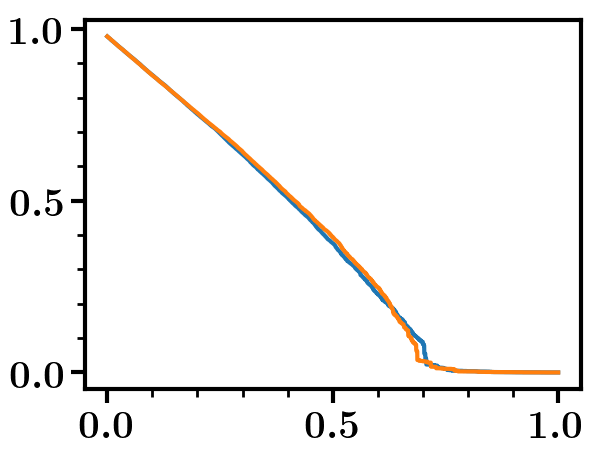

In [421]:
for i, N in enumerate(N_values[-1:]):
    plt.plot(np.arange(len(mean_Ngcc_values[N]['DegU']))/N, mean_Ngcc_values[N]['DegU']/N, color=colors[i])
    plt.plot(np.arange(len(mean_Ngcc_values[N]['Ran']))/N, mean_Ngcc_values[N]['Ran']/N, color=colors[i+1])

/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: divide by zero encountered in true_divide


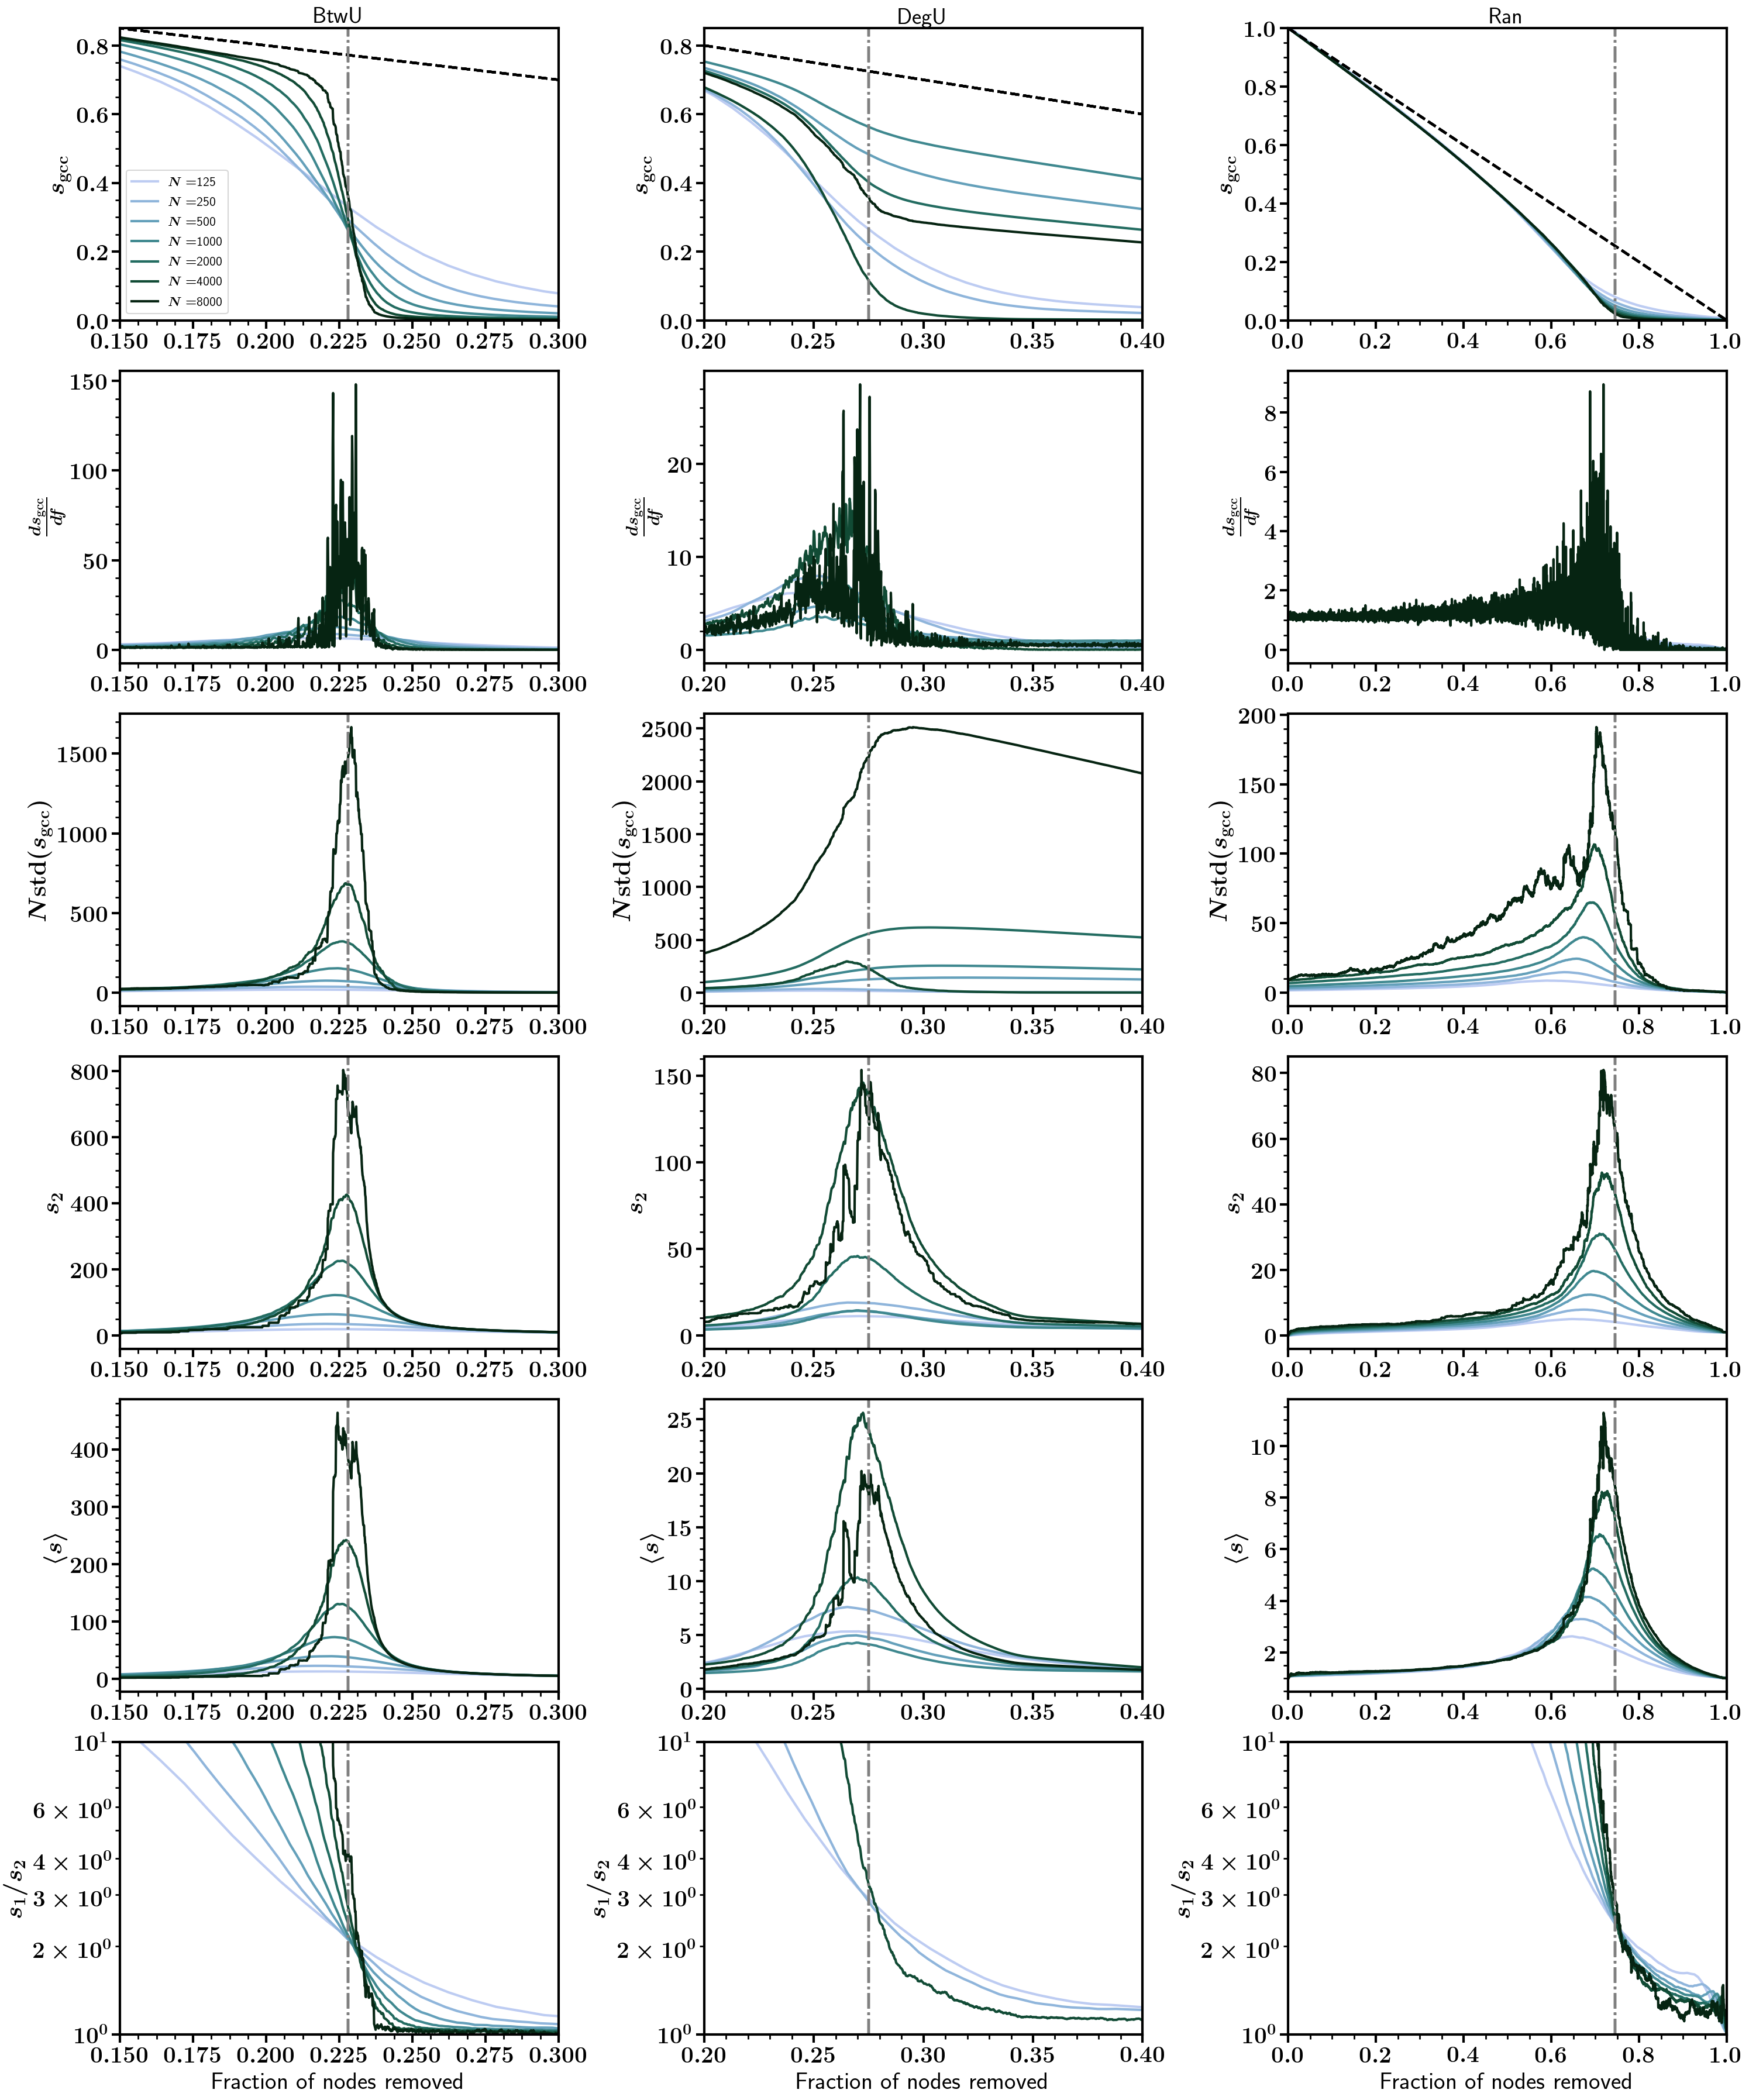

In [366]:
#palette = sns.cubehelix_palette(
#    n_colors=len(N_values), start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
#)
#plt.rc('axes', prop_cycle=cycler('color', palette))

xlims = [(0.15, 0.3), (0.2, 0.4), (0., 1)]
#xlims = [(0.2, 0.25), (0.20, 0.35), (0.8, 0.95)]
vlines = [0.228, 0.275, 0.745]

ncols = 3
nrows = 6
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, attack in enumerate(attacks):
        
    for j, N in enumerate(N_values):
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        ax = axes[0][i]
        ax.set_title(attack, fontsize=28)
        ax.set_ylabel(r'$s_{\mathrm{gcc}}$')
        ax.set_xlabel('')
        ax.set_xlim(xlims[i])

        if attack == 'BtwU':
            ax.set_ylim(0, 0.85)
        if attack == 'DegU':
            ax.set_ylim(0, 0.85)
        if attack == 'Ran':
            ax.set_ylim(0, 1)
            
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0
        if i == 0:
            ax.plot(X, Y, label=r'$N = $' + '{}'.format(N))
            ax.legend(loc='best', fontsize=16)
        else:
            ax.plot(X, Y)
        
        line_x = np.arange(0, 1.01, 0.01)
        line_y = 1 - line_x
        ax.plot(line_x, line_y, '--', color='k')
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        
        #if N > 2000:
        #    continue
        
        ax = axes[1][i]
        #ax.set_prop_cycle(cycler('color', palette))
        ax.set_ylabel(r'$\frac{ds_{\mathrm{gcc}}}{df}$')
        ax.set_xlabel('')
        ax.set_xlim(xlims[i])
            
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0
        dX = X[1] - X[0]
        dYdX = np.gradient(Y, dX)
        ax.plot(X, -dYdX)
              
        
        ax = axes[2][i]
        ax.set_ylabel(r'$N \mathrm{std}(s_{\mathrm{gcc}})$')
        ax.set_xlabel('')
        ax.set_xlim(xlims[i])

        if False:
            if attack == 'BtwU':
                ax.set_ylim(0, 0.85)
            if attack == 'DegU':
                ax.set_ylim(0, 0.85)
            if attack == 'Ran':
                ax.set_ylim(0, 1)
            
        X = np.arange(Ngcc0) / Ngcc0
        Y = np.sqrt(var_Ngcc_values[N][attack][:Ngcc0])
        ax.plot(X, Y)
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        #ax.set_yscale('log')
        
        ax = axes[3][i]
        ax.set_xlabel('')
        ax.set_xlim(xlims[i])

        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Nsec_values[N][attack][:Ngcc0]

        ax.plot(X, Y)
        ax.set_ylabel(r'$s_2$')
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        
        
        ax = axes[4][i]
        ax.set_xlabel('')
        ax.set_xlim(xlims[i]) 
        
        X = np.arange(Ngcc0) / Ngcc0
        Y1 = mean_finiteSizeMeassures['meanS'][N][attack][:Ngcc0]
        Y2 = mean_finiteSizeMeassures['meanS2'][N][attack][:Ngcc0]
        Y3 = mean_finiteSizeMeassures['binder'][N][attack][:Ngcc0]
        Y4 = mean_finiteSizeMeassures['binder2'][N][attack][:Ngcc0]

        if i == 0:
            ax.plot(X, Y1)
            #ax.plot(X, Y2)
            #ax.plot(X, Y3)
            #ax.plot(X, Y4)
        elif i == 1:
            ax.plot(X, Y1)
            #ax.plot(X, Y2)
            #ax.plot(X, Y3)
            #ax.plot(X, Y4)
        elif i == 2:
            ax.plot(X, Y1)
            #ax.plot(X, Y2)
            #ax.plot(X, Y3)
            #ax.plot(X, Y4)
        ax.set_ylabel(r'$\langle s \rangle$')
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        
        
        ax = axes[5][i]
        #if N > 2000:
        #    continue
        ax.set_ylabel(r'$s_1 / s_2$')
        ax.set_xlabel('Fraction of nodes removed')
        #ax.set_xscale('log')
        ax.set_yscale('log')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / mean_Nsec_values[N][attack][:Ngcc0]
        ax.plot(X, Y)
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.set_xlim(xlims[i])  
        if i == 0:
            ax.set_ylim(1, 10)
        else:
            ax.set_ylim(1, 10)

plt.tight_layout()

fig_base_name = 'Percolation_ER'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:168: RuntimeWarning: divide by zero encountered in true_divide


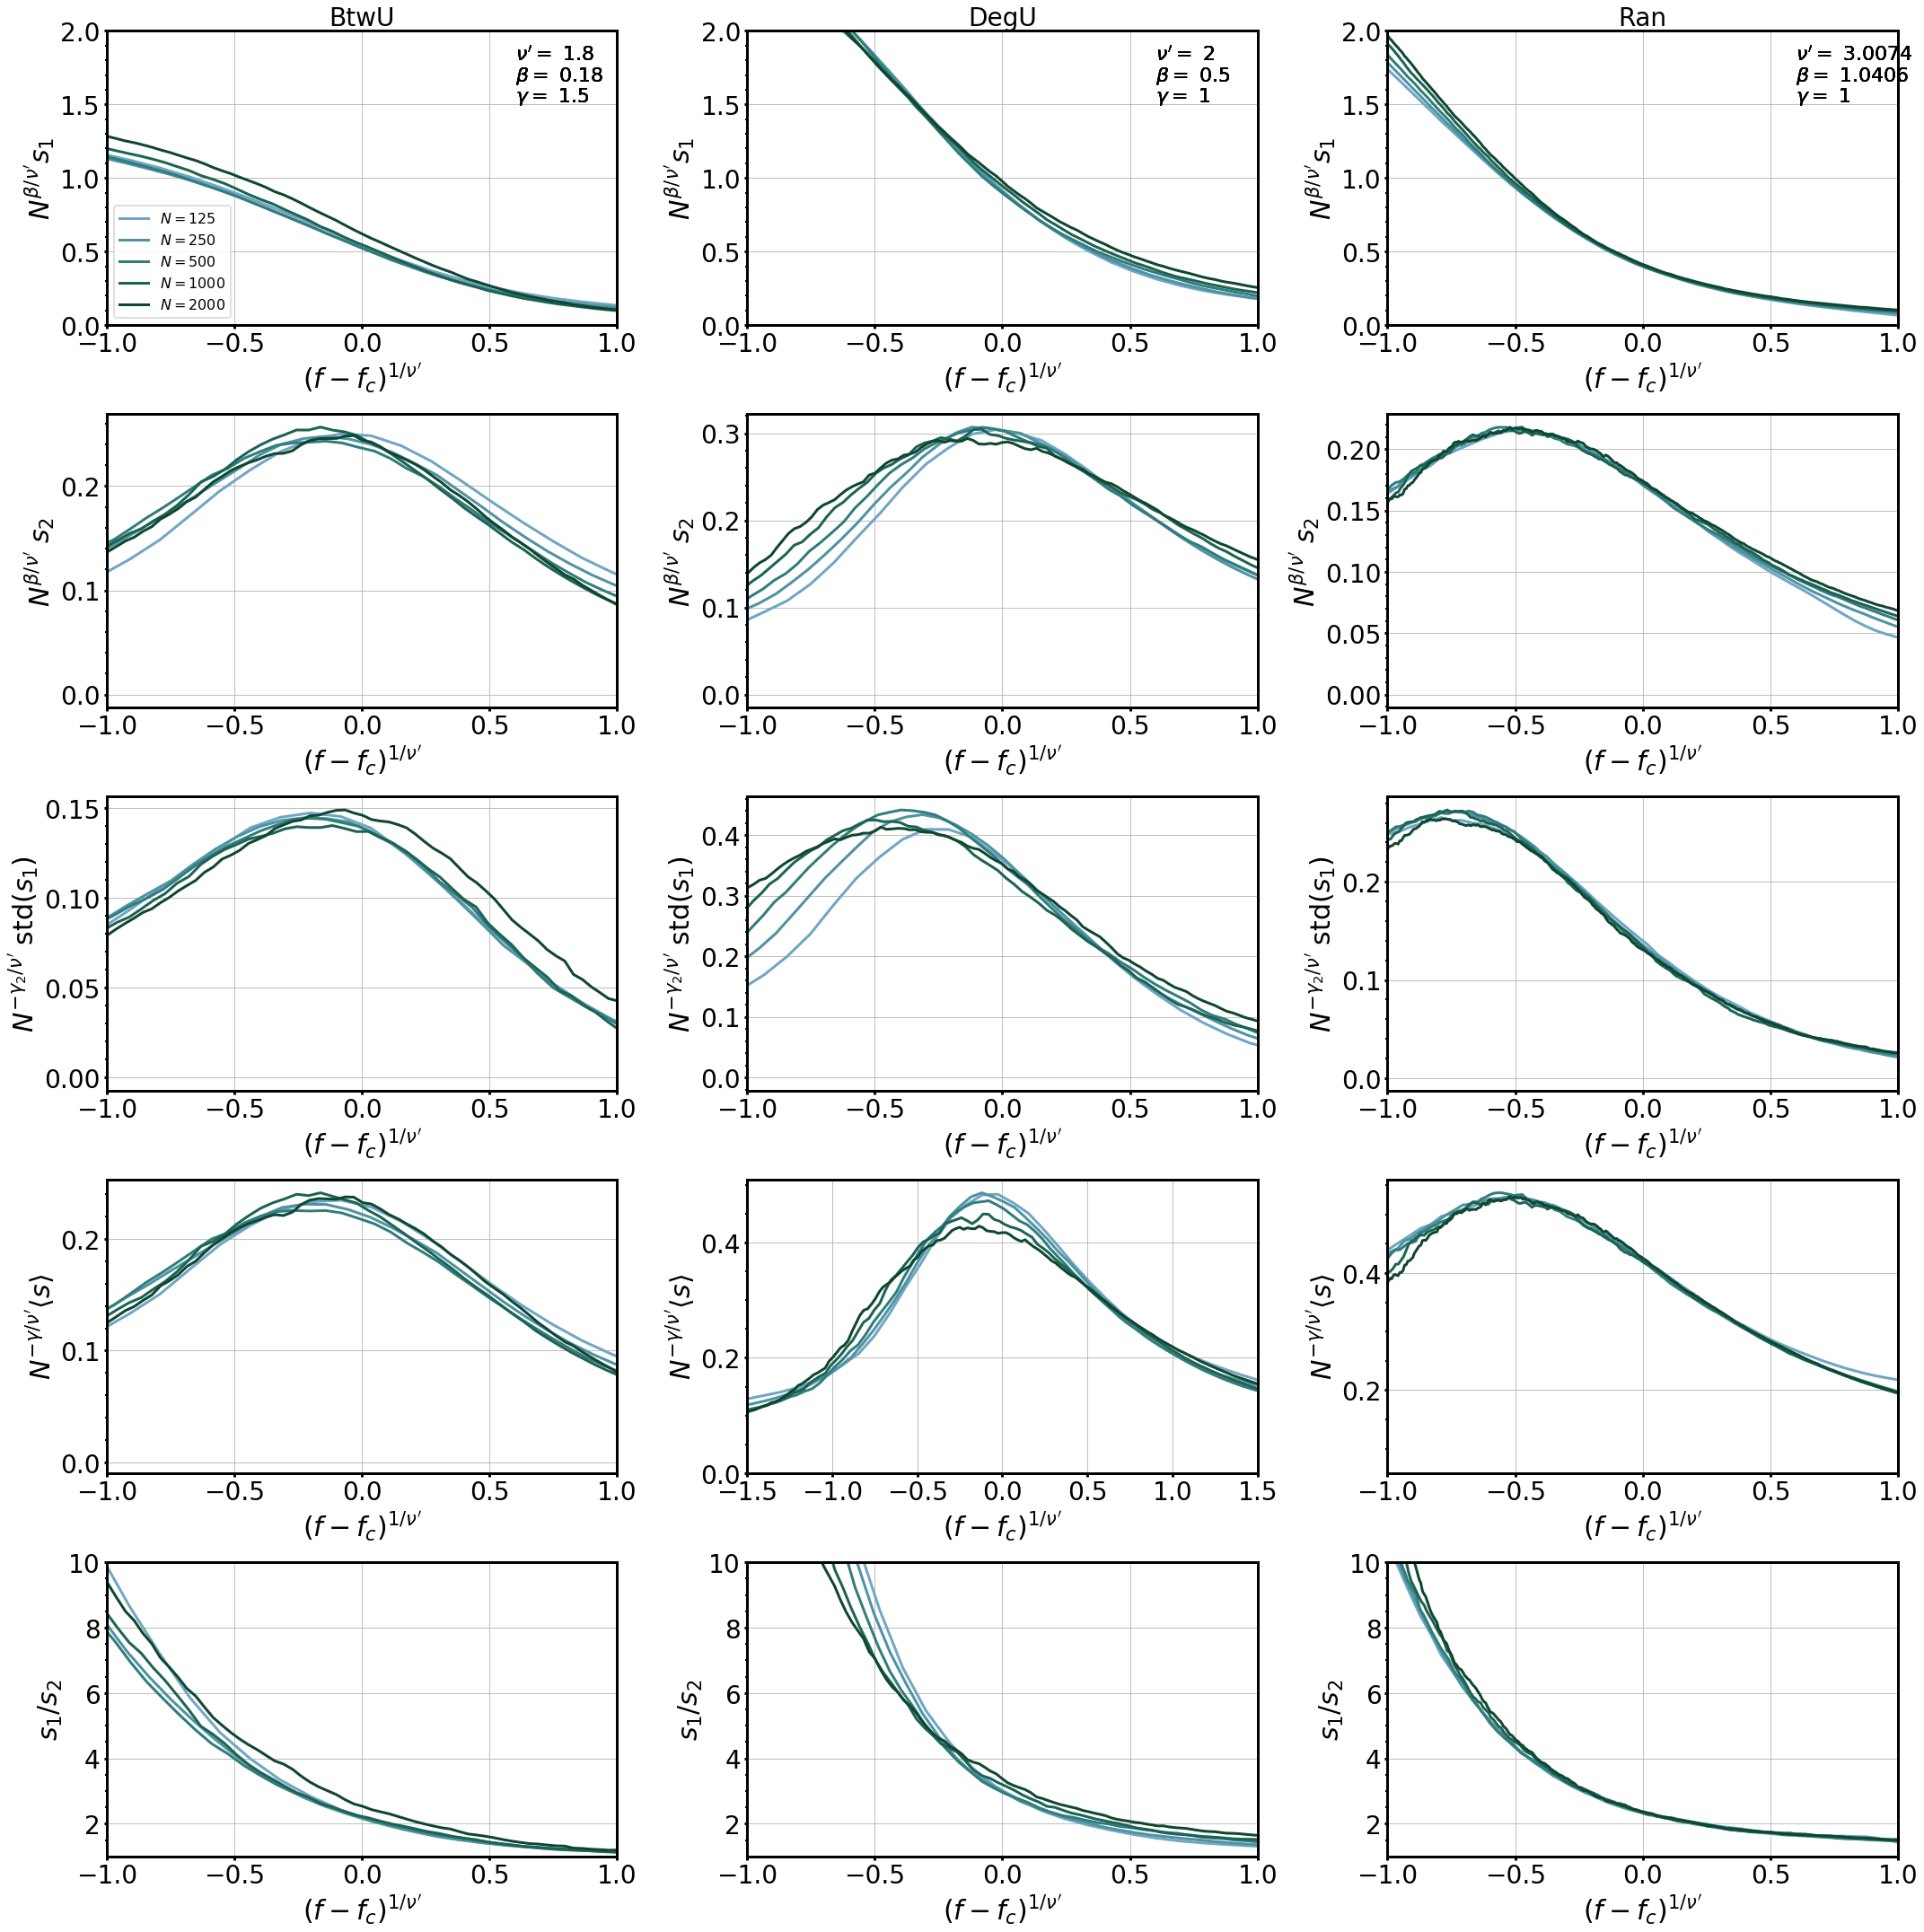

In [120]:
palette = sns.cubehelix_palette(
    n_colors=len(N_values), start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
)
plt.rc('axes', prop_cycle=cycler('color', palette))

xlims = [(0., 0.45), (0., 0.45), (0., 0.95)]

f_crit_values = {'BtwU': 0.227,
                 'DegU': 0.273,
                 #'Ran' : 0.75
                 #'BtwU': 0.225,
                 #'DegU': 0.27,
                 'Ran' : 0.75
                }

dnu_values = {'BtwU': 1.8,
              #'DegU': 5/2,
              'DegU': 2,
              #'Ran' : 3
              'Ran' : 3.0074}

beta_values = {'BtwU': 0.18,
               #'DegU': 5/8,
               'DegU': 1/2,
               #'Ran' : 1
               'Ran' : 1.0406}

gamma_values = {'BtwU': 1.5,
                'DegU': 1,
                'Ran' : 1}

gamma2_values = {'BtwU': 1.011*dnu_values['BtwU'],
                'DegU': 0.798*dnu_values['DegU'],
                'Ran' : 0.726*dnu_values['Ran']}

ncols = 3
nrows = 5
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, attack in enumerate(attacks):
        
    for N in N_values:
        
        if N > 2000:
            continue
        
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        ax = axes[0][i]
        ax.set_ylabel(r"$N^{\beta/\nu'}s_1$")
        ax.set_xlabel(r"$(f-f_c)^{1/\nu'}$")
        ax.set_title(attack, fontsize=28)

        x_exponent = 1 / dnu_values[attack]
        y_exponent =  beta_values[attack] / dnu_values[attack]
        X = (np.arange(Ngcc0) / Ngcc0 - f_crit_values[attack]) * Ngcc0**x_exponent
        Y = (mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0) * Ngcc0**y_exponent        
        ax.text(0.8, 0.9, r"$\nu' =$" + r' {}'.format(dnu_values[attack]), 
                transform=ax.transAxes, fontsize=22)   
        ax.text(0.8, 0.83, r'$\beta =$' + r' {}'.format(beta_values[attack]), 
                transform=ax.transAxes, fontsize=22)
        ax.text(0.8, 0.76, r'$\gamma =$' + r' {}'.format(gamma_values[attack]), 
                transform=ax.transAxes, fontsize=22) 
        
        if attack == 'BtwU':
            ax.set_ylim(0, 2)
            ax.set_xlim(-1, 1)
        if attack == 'DegU':
            ax.set_ylim(0, 2)
            ax.set_xlim(-1, 1)
        if attack == 'Ran':
            ax.set_ylim(0, 2)
            ax.set_xlim(-1, 1)

        if i == 0:
            ax.plot(X, Y, label=r'$N = $' + '{}'.format(N))
            ax.legend(loc=3, fontsize=16)
        else:
            ax.plot(X, Y)
        
        #ax.text(0.25, 0.15, attack, transform=ax.transAxes, fontsize=26)
        ax.grid(True)
        
        ax = axes[1][i]
        ax.grid(True)
        
        if N > 2000:
            continue
        
        ax.set_xlabel(r"$(f-f_c)^{1/\nu'}$")
        ax.set_ylabel(r"$N^{\beta/\nu'}\;s_2$")
        
        x_exponent = 1 / dnu_values[attack]
        y_exponent =  beta_values[attack] / dnu_values[attack]
        
        #if attack == 'BtwU':
        #    x_exponent = 0.55
        #    y_exponent = 0.1
        
        X = (np.arange(Ngcc0) / Ngcc0 - f_crit_values[attack]) * Ngcc0**x_exponent
        Y = (mean_Nsec_values[N][attack][:Ngcc0] / Ngcc0) * Ngcc0**y_exponent
        ax.plot(X, Y)

        if i == 0:           
            ax.set_xlim(-1, 1)
        elif i == 1:
            ax.set_xlim(-1, 1)
        elif i == 2:
            ax.set_xlim(-1, 1)
            

        ax = axes[2][i]
        ax.grid(True)
        ax.set_xlabel(r"$(f-f_c)^{1/\nu'}$")
        ax.set_ylabel(r"$N^{-\gamma_2/\nu'}\;\mathrm{std}(s_1)$")
        
        x_exponent = 1 / dnu_values[attack]
        y_exponent =  -gamma2_values[attack] / dnu_values[attack]
                
        X = (np.arange(Ngcc0) / Ngcc0 - f_crit_values[attack]) * Ngcc0**x_exponent
        Y = np.sqrt(var_Ngcc_values[N][attack][:Ngcc0]) * Ngcc0**y_exponent
        ax.plot(X, Y)

        if i == 0:           
            ax.set_xlim(-1, 1)
        elif i == 1:
            ax.set_xlim(-1, 1)
        elif i == 2:
            ax.set_xlim(-1, 1)
        
        
        ax = axes[3][i]
        ax.grid(True)            
        ax.set_xlabel(r"$(f-f_c)^{1/\nu'}$")
        ax.set_ylabel(r"$N^{-\gamma/\nu'} \langle s \rangle$")
        
        x_exponent = 1 / dnu_values[attack]
        y_exponent = - gamma_values[attack] / dnu_values[attack]
        
        #if attack == 'BtwU':
        #    x_exponent = 0.55
        #    y_exponent = -0.82
        
        X = (np.arange(Ngcc0) / Ngcc0 - f_crit_values[attack]) * Ngcc0**x_exponent
        Y = mean_finiteSizeMeassures['meanS'][N][attack][:Ngcc0]* Ngcc0**y_exponent
        ax.plot(X, Y)
        
        if i == 0:       
            ax.set_xlim(-1, 1)

        elif i == 1:
            ax.set_xlim(-1.5, 1.5)
        elif i == 2:
            ax.set_xlim(-1, 1)


        ax = axes[4][i]
        ax.grid(True)
        

        ax.set_ylabel(r'$s_1 / s_2$')
        ax.set_xlabel(r"$(f-f_c)^{1/\nu'}$")
        #ax.set_xscale('log')
        #ax.set_yscale('log')
        
        x_exponent = 1 / dnu_values[attack]  
        X = (np.arange(Ngcc0) / Ngcc0 - f_crit_values[attack]) * Ngcc0**x_exponent
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / mean_Nsec_values[N][attack][:Ngcc0]
        ax.plot(X, Y)
        if i == 0:
            ax.set_xlim(-1, 1)  
            ax.set_ylim(1, 10)
        elif i == 1:
            ax.set_xlim(-1, 1)  
            ax.set_ylim(1, 10)
        elif i == 2:
            ax.set_xlim(-1, 1)  
            ax.set_ylim(1, 10)
        
        

plt.tight_layout()

fig_base_name = 'Percolation_ER_scaled'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


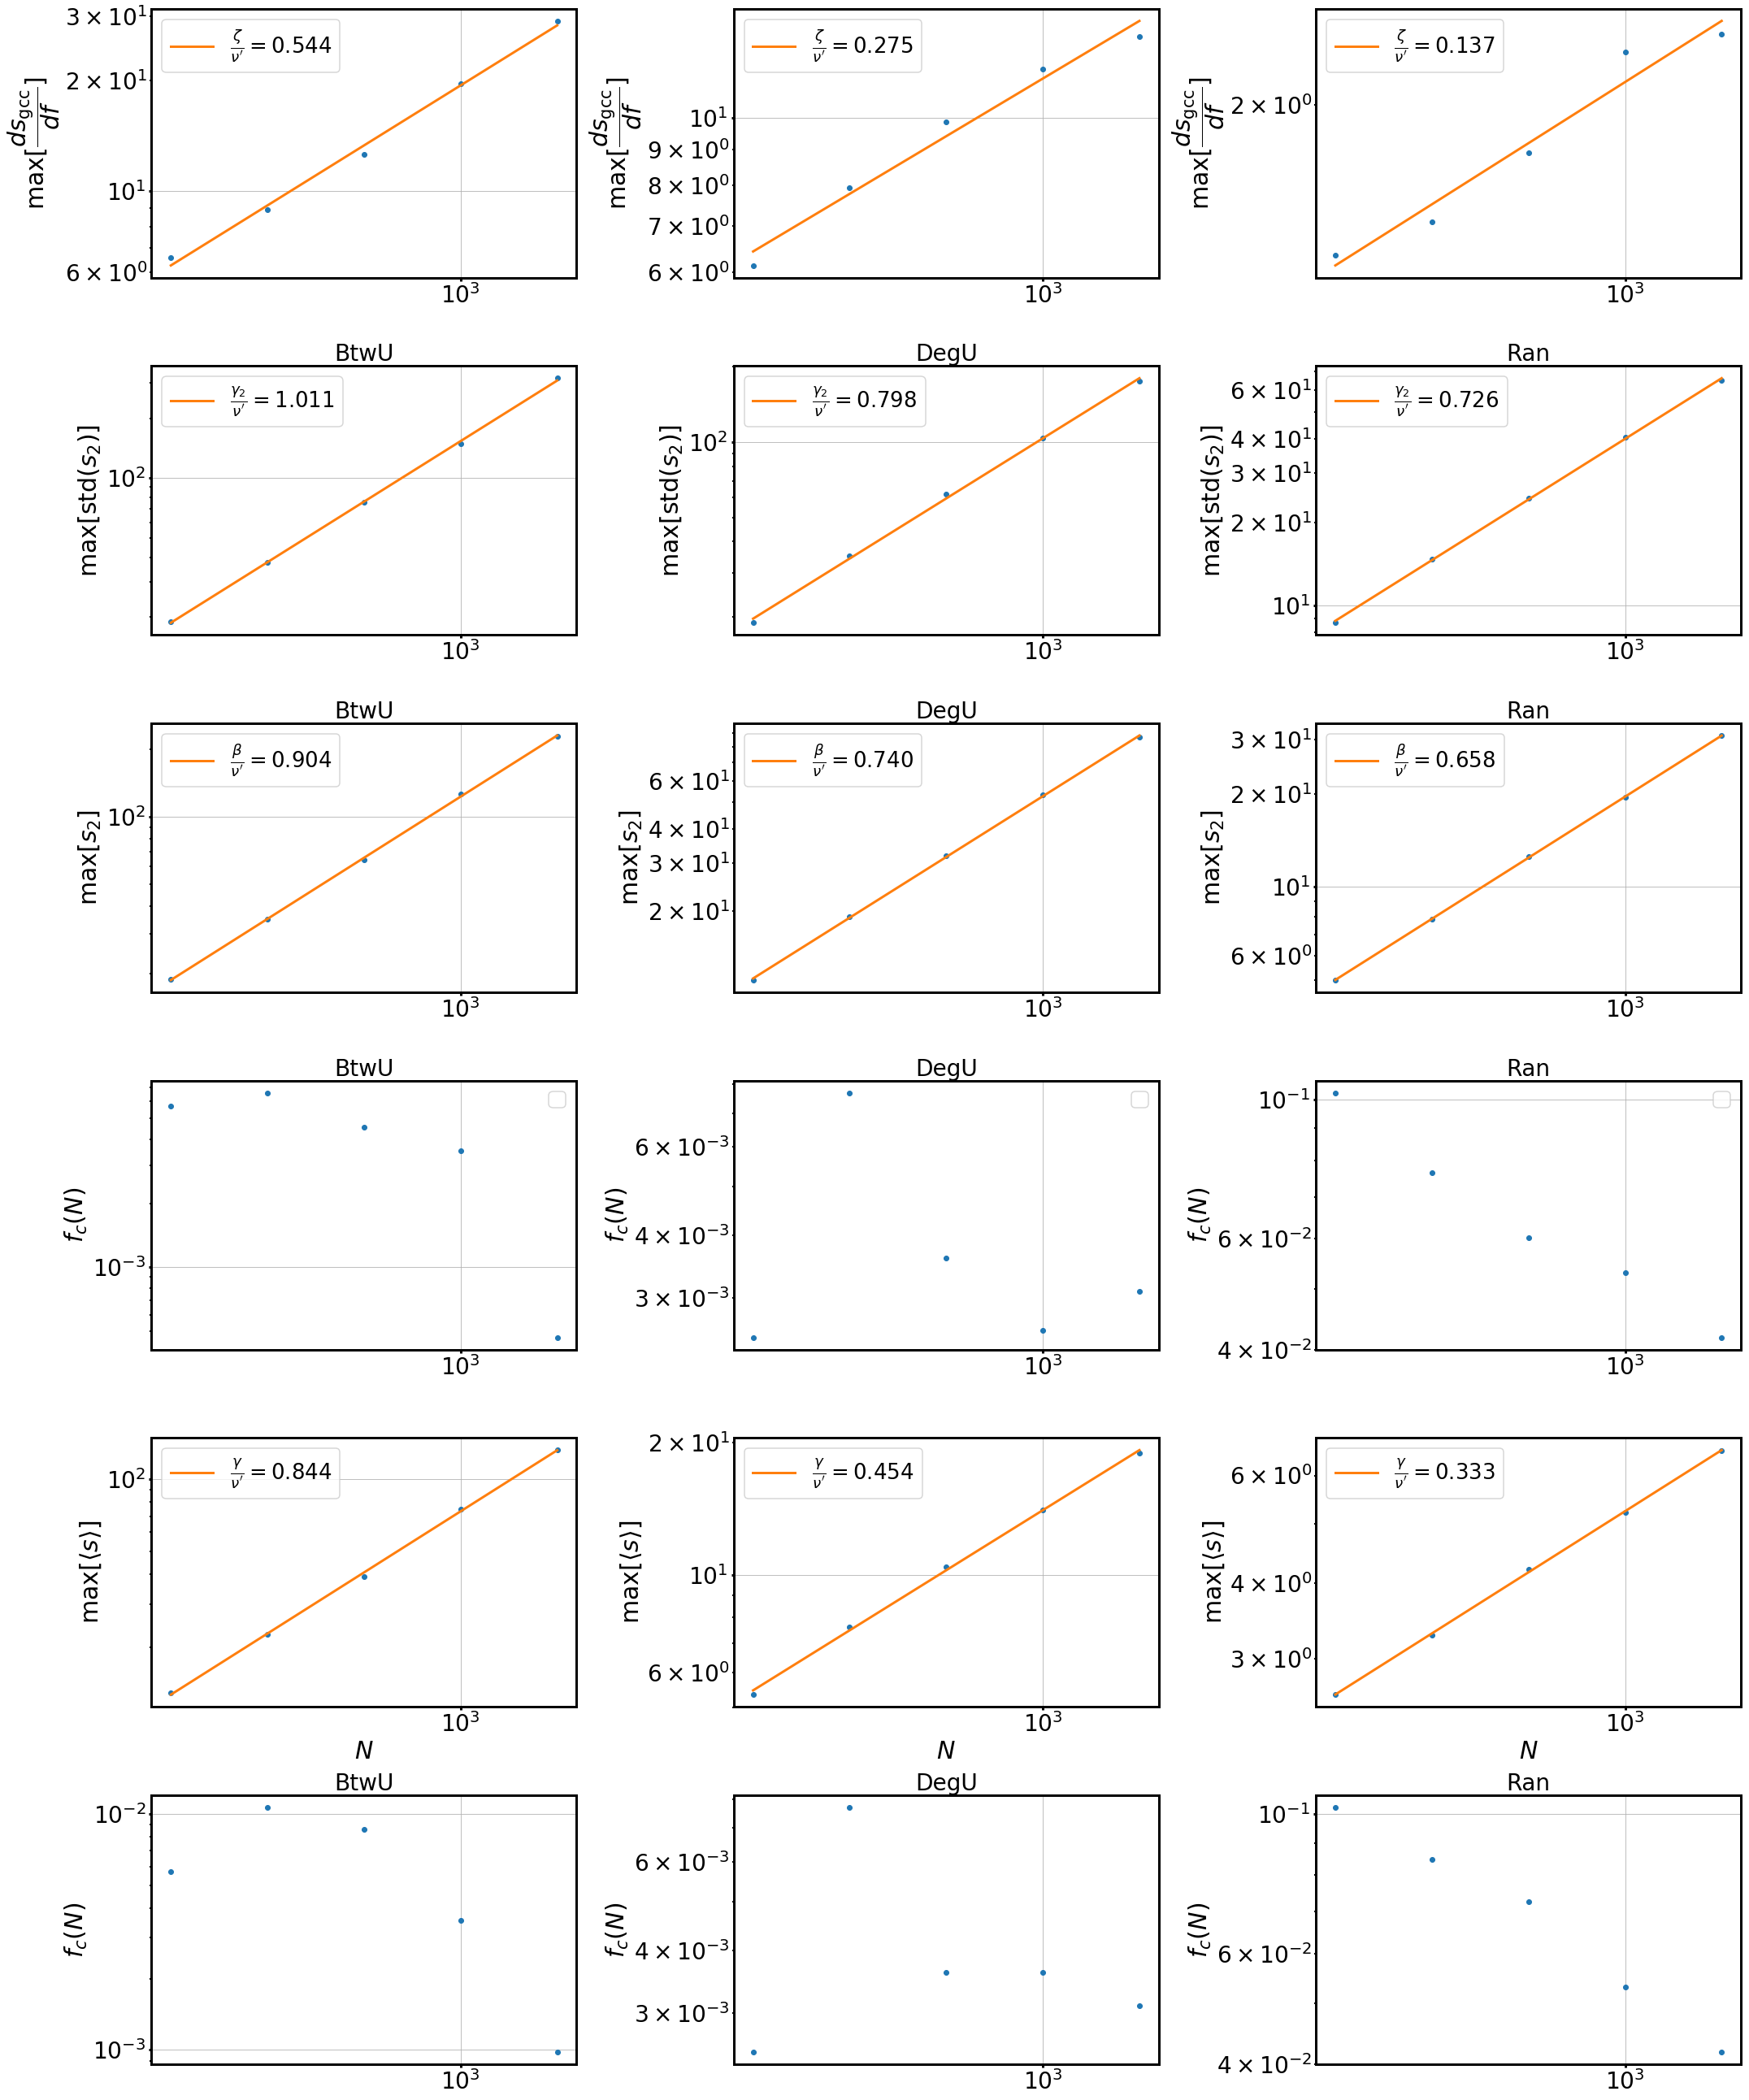

In [8]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class

from scipy.optimize import curve_fit

def fc_by_N(N, pc, b, nu):
    return pc - b*N**(-1/nu)

_N_values = N_values[:-2]

pguess = {}
for attack in attacks:
    pguess[attack] = [f_crit_values[attack], 1, dnu_values[attack]]

Ngcc_crit = {}
max_dNgcc = {}
max_stdNgcc = {}
max_stdNgcc_loc = {}
max_Nsec = {}
max_Nsec_loc = {}
max_meanSizes = {}
max_meanSizes_loc = {}
for i, attack in enumerate(attacks):
    Ngcc_crit[attack] = []
    max_dNgcc[attack] = []
    max_stdNgcc[attack] = []
    max_stdNgcc_loc[attack] = []
    max_Nsec[attack] = []
    max_Nsec_loc[attack] = []
    max_meanSizes[attack] = []
    max_meanSizes_loc[attack] = []
    for N in _N_values:
        
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0
        dX = X[1] - X[0]
        dYdX = -np.gradient(Y, dX)
        
        idx = np.argmax(dYdX)
        Y_max = dYdX[idx]     
        max_dNgcc[attack].append(Y_max)
        
        
        idx = np.argmax(var_Ngcc_values[N][attack])
        Y = np.sqrt(var_Ngcc_values[N][attack][idx])
        max_stdNgcc[attack].append(Y)
        Y_loc = (np.arange(Ngcc0) / Ngcc0)[idx]
        max_stdNgcc_loc[attack].append(Y_loc)
        
        
        idx = np.argmax(mean_Nsec_values[N][attack])
        Y = mean_Nsec_values[N][attack][idx]
        max_Nsec[attack].append(Y)
        Y_loc = (np.arange(Ngcc0) / Ngcc0)[idx]
        max_Nsec_loc[attack].append(Y_loc)
        
        
        idx = np.nanargmax(mean_finiteSizeMeassures['meanS'][N][attack])
        Y = mean_finiteSizeMeassures['meanS'][N][attack][idx]
        max_meanSizes[attack].append(Y)
        Y_loc = (np.arange(Ngcc0) / Ngcc0)[idx]
        max_meanSizes_loc[attack].append(Y_loc)     
        
        #int(N*f_value)
        
    max_dNgcc[attack] = np.array(max_dNgcc[attack])
    max_stdNgcc[attack] = np.array(max_stdNgcc[attack])
    max_Nsec[attack] = np.array(max_Nsec[attack])
    max_meanSizes[attack] = np.array(max_meanSizes[attack])
    
    max_stdNgcc_loc[attack] = np.array(max_stdNgcc_loc[attack])
    max_Nsec_loc[attack] = np.array(max_Nsec_loc[attack])
    max_meanSizes_loc[attack] = np.array(max_meanSizes_loc[attack])
    

ncols = 3
nrows = 6
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, attack in enumerate(attacks):
                 
    ax = axes[0][i]
    ax.grid(True)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$\mathrm{max}[ \dfrac{ds_{\mathrm{gcc}}}{df} ]$")

    ax.plot(_N_values, max_dNgcc[attack], 'o')
    
    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(max_dNgcc[attack]).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    slope = linear_regressor.coef_[0][0]
    ax.plot(_N_values, np.exp(Y_pred), label=r"$\frac{\zeta}{\nu'} =$" + '{:.3f}'.format(slope))
    ax.legend(loc='best')
    
    ax = axes[1][i]
    ax.grid(True)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$\mathrm{max}[ \mathrm{std}(s_1) ]$")
    ax.set_title(attack, fontsize=28)

    ax.plot(_N_values, max_stdNgcc[attack], 'o')
    
    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(max_stdNgcc[attack]).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    slope = linear_regressor.coef_[0][0]
    ax.plot(_N_values, np.exp(Y_pred), label=r"$\frac{\gamma_2}{\nu'} =$" + '{:.3f}'.format(slope))
    ax.legend(loc='best')
    
    
    ax = axes[2][i]
    ax.grid(True)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$\mathrm{max}[ s_2 ]$")
    ax.set_title(attack, fontsize=28)

    ax.plot(_N_values, max_Nsec[attack], 'o')
    
    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(max_Nsec[attack]).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    slope = linear_regressor.coef_[0][0]
    ax.plot(_N_values, np.exp(Y_pred), label=r"$\frac{\beta}{\nu'} =$" + '{:.3f}'.format(slope))
    ax.legend(loc='best')
    
    
    ax = axes[3][i]
    ax.grid(True)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$f_c(N)$")
    ax.set_title(attack, fontsize=28)
   
    X = _N_values
    Y = max_Nsec_loc[attack]
    #popt, pcov = curve_fit(fc_by_N, X, Y, pguess[attack])
    #pc, b, nu = popt
    #print(popt)
    #Y_pred = fc_by_N(X, *popt)
    ax.plot(_N_values, f_crit_values[attack] - max_Nsec_loc[attack], 'o')
    #ax.plot(N_values[:-1], (pc - Y_pred))
    
    ax.legend(loc='best')
    
    ax = axes[4][i]
    ax.grid(True)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r"$N$")
    ax.set_ylabel(r"$\mathrm{max}[ \langle s \rangle ]$")

    ax.plot(_N_values, max_meanSizes[attack], 'o')
    
    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(max_meanSizes[attack]).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    slope = linear_regressor.coef_[0][0]
    ax.plot(_N_values, np.exp(Y_pred), label=r"$\frac{\gamma}{\nu'} =$" + '{:.3f}'.format(slope))
    ax.legend(loc='best')
    
    ax = axes[5][i]
    ax.grid(True)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$f_c(N)$")
    ax.set_title(attack, fontsize=28)
   
    X = _N_values
    Y = max_meanSizes_loc[attack]
    #popt, pcov = curve_fit(fc_by_N, X, Y, pguess[attack])
    #pc, b, nu = popt
    #print(popt)
    #Y_pred = fc_by_N(X, *popt)
    ax.plot(_N_values, f_crit_values[attack] - max_meanSizes_loc[attack], 'o')
    #ax.plot(N_values[:-1], (pc - Y_pred))

plt.tight_layout()

fig_base_name = 'Peaks_scaling'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

### Delta Betweenness

In [86]:
N_values = [125, 250, 500, 1000, 2000]
p_values = [0.032, 0.016, 0.008, 0.004, 0.002]

seeds = {125:  range(5000),
         250:  range(5000),
         500:  range(2000),
         1000: range(1000),
         2000: range(1000)}

Ngcc_values = {}
delta2_btw_sum = {}
mean_Ngcc_values = {}
mean_delta2_btw_sum = {}

for i, (N, p) in enumerate(zip(N_values, p_values)):
    print(N)
    Ngcc_values[N] = {}
    delta2_btw_sum[N] = {}
        
    mean_Ngcc_values[N] = {}
    mean_delta2_btw_sum[N] = {}

    for attack in attacks:
        
        Ngcc_values[N][attack] = []
        delta2_btw_sum[N][attack] = []
        
        for seed in seeds[N]:
                       
            network = 'ER_N{}_p{}_{:05d}'.format(N, p, seed)
            network_file = network + '.txt'
            full_network_path = os.path.join(net_dir_name, network, network_file)
            
            attack_dir_name = os.path.join(net_dir_name, network, attack)
            
            full_Ngcc_file_name  = os.path.join(attack_dir_name, 'Ngcc_values.txt')
            aux = np.loadtxt(full_Ngcc_file_name, dtype=float)
            _Ngcc_values = aux[:,0]
            
            full_deltaBtw_file_name  = os.path.join(attack_dir_name, 'deltaBtw.txt')
            _delta2_btw_sum = np.loadtxt(full_deltaBtw_file_name)

            Ngcc_values[N][attack].append(_Ngcc_values)
            delta2_btw_sum[N][attack].append(_delta2_btw_sum)

        mean_Ngcc_values[N][attack] = np.nanmean(Ngcc_values[N][attack], axis=0)
        mean_delta2_btw_sum[N][attack] = np.nanmean(delta2_btw_sum[N][attack], axis=0)

data = [
        mean_Ngcc_values,
        mean_delta2_btw_sum
]        
with open(os.path.join(net_dir_name, 'deltaBtw_data.pickle'), 'wb') as f:
    pickle.dump(data, f)

125


/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: Mean of empty slice


250
500
1000
2000


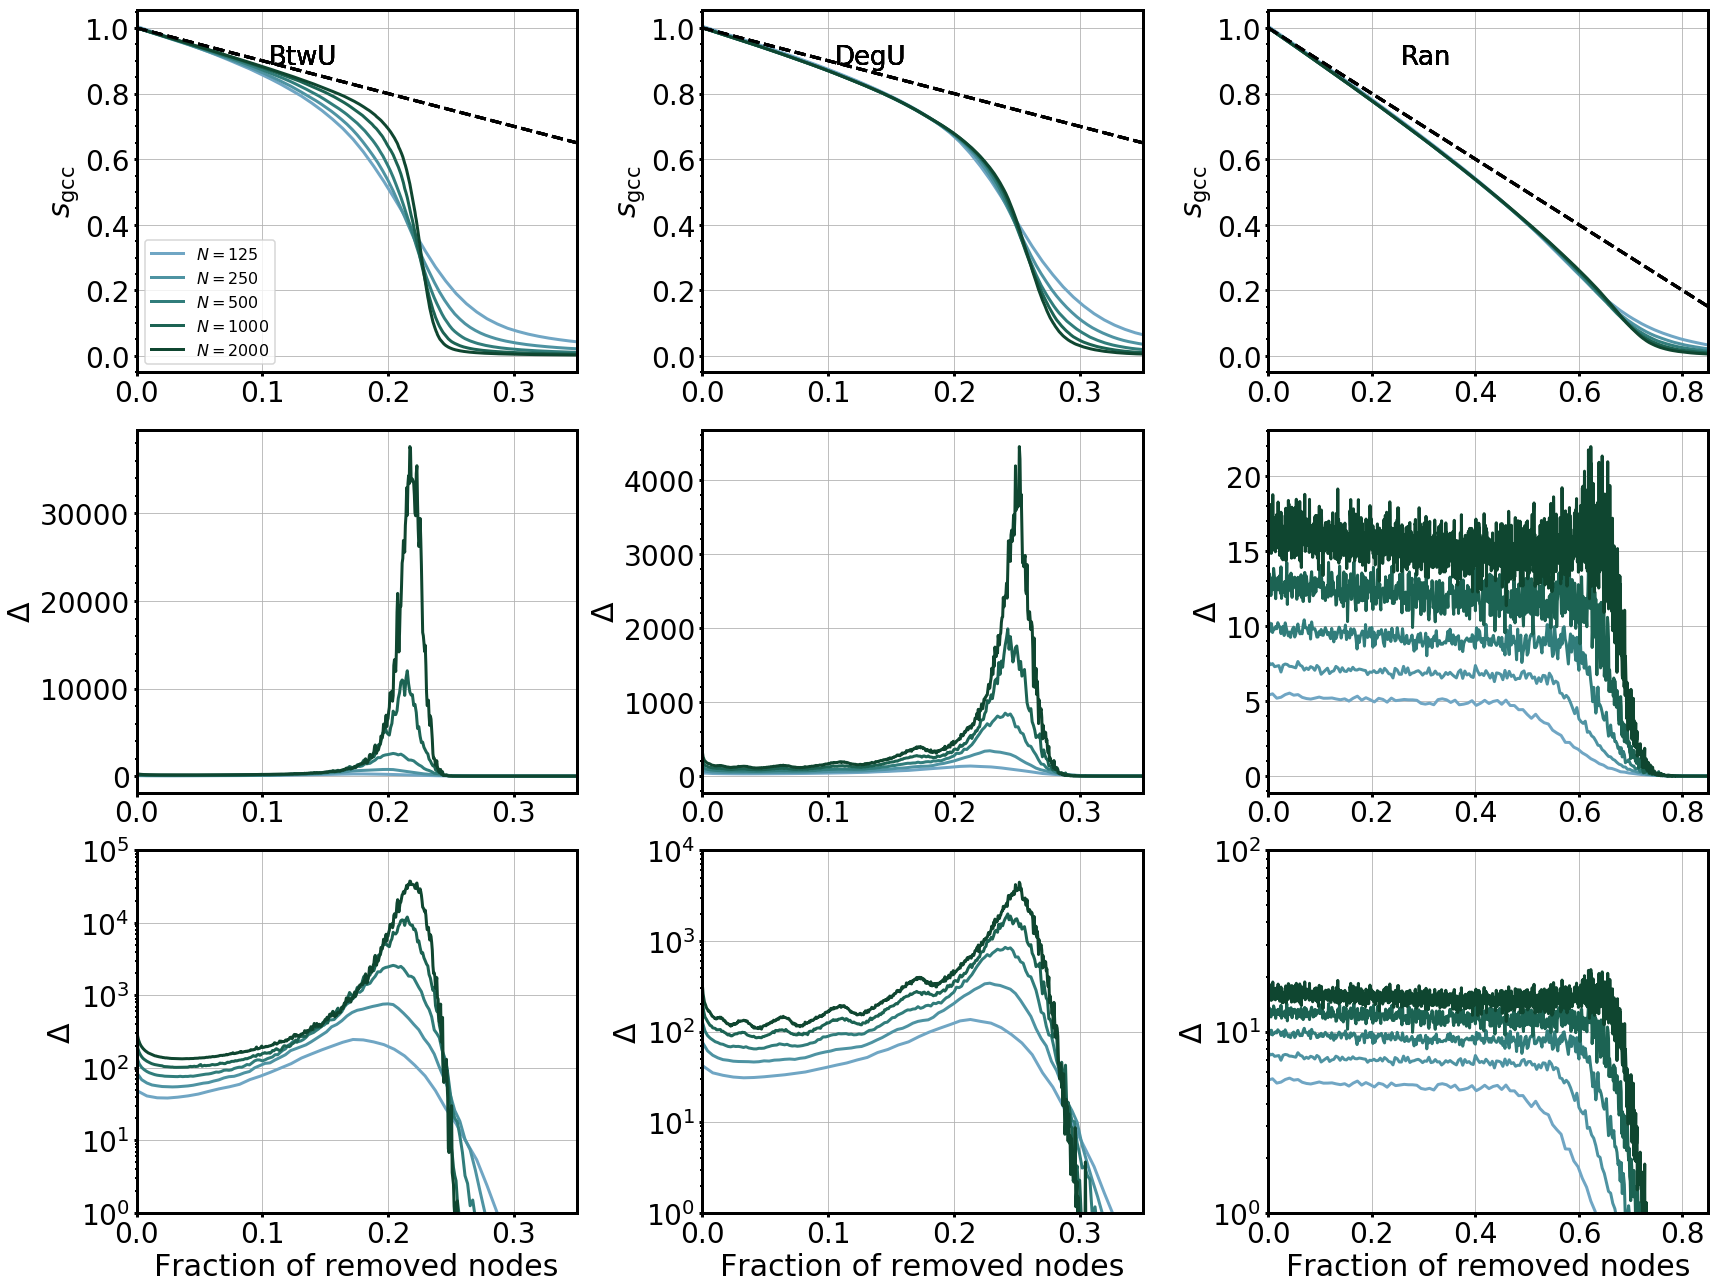

In [121]:
palette = sns.cubehelix_palette(
    n_colors=len(N_values), start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
)
plt.rc('axes', prop_cycle=cycler('color', palette))

fig, axes = plt.subplots(figsize=(24, 18), ncols=3, nrows=3)

x_lims = [(0, 0.35), (0, 0.35), (0, 0.85)]

ylims = [[], [], [(1E0, 1E5), (1E0, 1E4), (1E0, 1E2)]]

for i, attack in enumerate(attacks):
        
    for N in N_values:
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        ax = axes[0][i]
        ax.grid(True)
        ax.set_ylabel(r'$s_{\mathrm{gcc}}$')
        #ax.set_xlabel('Fraction of removed nodes')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0
        ax.set_xlim(x_lims[i])
        if i == 0:
            ax.plot(X, Y, label=r'$N = $' + '{}'.format(N))
            ax.legend(loc='best', fontsize=16)
        else:
            ax.plot(X, Y)
        line_x = np.arange(0, 1.01, 0.01)
        line_y = 1 - line_x
        ax.plot(line_x, line_y, '--', color='k')
        
        ax.text(0.3, 0.85, attack, transform=ax.transAxes, fontsize=26)
        #ax.set_xlim(0.20, 0.25)

        ax = axes[1][i]
        ax.grid(True)
        ax.set_xlabel('')
        
        ax.set_xlim(x_lims[i])
        X2 = np.arange(len(mean_delta2_btw_sum[N][attack])) / Ngcc0
        Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2)
        ax.set_ylabel(r'$\Delta$')
        #Y2 = mean_delta2_btw_sum[N][attack] / (mean_Ngcc_values[N][attack]**2)

        ax.plot(X2, Y2)
        
        ax = axes[2][i]
        ax.grid(True)
        ax.set_xlabel('Fraction of removed nodes')
        
        ax.set_xlim(x_lims[i])
        ax.set_ylim(ylims[2][i])
        X2 = np.arange(len(mean_delta2_btw_sum[N][attack])) / Ngcc0
        Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2)
        ax.set_ylabel(r'$\Delta$')
        #Y2 = mean_delta2_btw_sum[N][attack] / ((Ngcc0**2)*N**(0))
        #Y2 = mean_delta2_btw_sum[N][attack] / (mean_Ngcc_values[N][attack]**2)
        
        ax.set_yscale('log')
        Y2[Y2==0] = np.NaN
        ax.plot(X2, Y2)
        #ax2.set_ylim(10E-8, 1)

plt.tight_layout()

fig_base_name = 'Btw_change_ER'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

### Btw order parameters

In [287]:
net_dir_name = '../networks/ER'

N_values = [125, 250, 500, 1000, 2000]
p_values = [0.032, 0.016, 0.008, 0.004, 0.002]
seeds_by_N = [range(2000), range(2000), range(1000), range(1000), range(1000)]

attacks = ['BtwU', 'DegU', 'Ran']

spin_types = [0, 1, 2, 3, 4]

spin_sums = {}
for spin_type in spin_types:
    spin_sums[spin_type] = {}

mean_spin_sums = {}
var_spin_sums  = {}    
for spin_type in spin_types:
    mean_spin_sums[spin_type] = {}
    var_spin_sums[spin_type]  = {}
    
for N, p, seeds in zip(N_values, p_values, seeds_by_N):
    print(N)
    for spin_type in spin_types:
        spin_sums[spin_type][N] = {}


    for spin_type in spin_types:
        mean_spin_sums[spin_type][N] = {}
        var_spin_sums[spin_type][N]  = {}

    for attack in attacks:
        
        for spin_type in spin_types:
            spin_sums[spin_type][N][attack] = []
        
        for seed in seeds:
                       
            network = 'ER_N{}_p{}_{:05d}'.format(N, p, seed)
            network_file = network + '.txt'
            full_network_path = os.path.join(net_dir_name, network, network_file)
            
            attack_dir_name = os.path.join(net_dir_name, network, attack)
            
            full_btw_file_name  = os.path.join(attack_dir_name, 'orderParams.txt')
            _spin_meassures = np.loadtxt(full_btw_file_name)
                       
            spin_sums[0][N][attack].append(_spin_meassures[:,0])
            spin_sums[1][N][attack].append(_spin_meassures[:,1])
            spin_sums[2][N][attack].append(_spin_meassures[:,2])
            spin_sums[3][N][attack].append(_spin_meassures[:,3])
            spin_sums[4][N][attack].append(_spin_meassures[:,4])

        for spin_type in spin_types:
            mean_spin_sums[spin_type][N][attack] = np.mean(spin_sums[spin_type][N][attack], axis=0)
            var_spin_sums[spin_type][N][attack] = np.var(spin_sums[spin_type][N][attack], axis=0)

125
250
500
1000


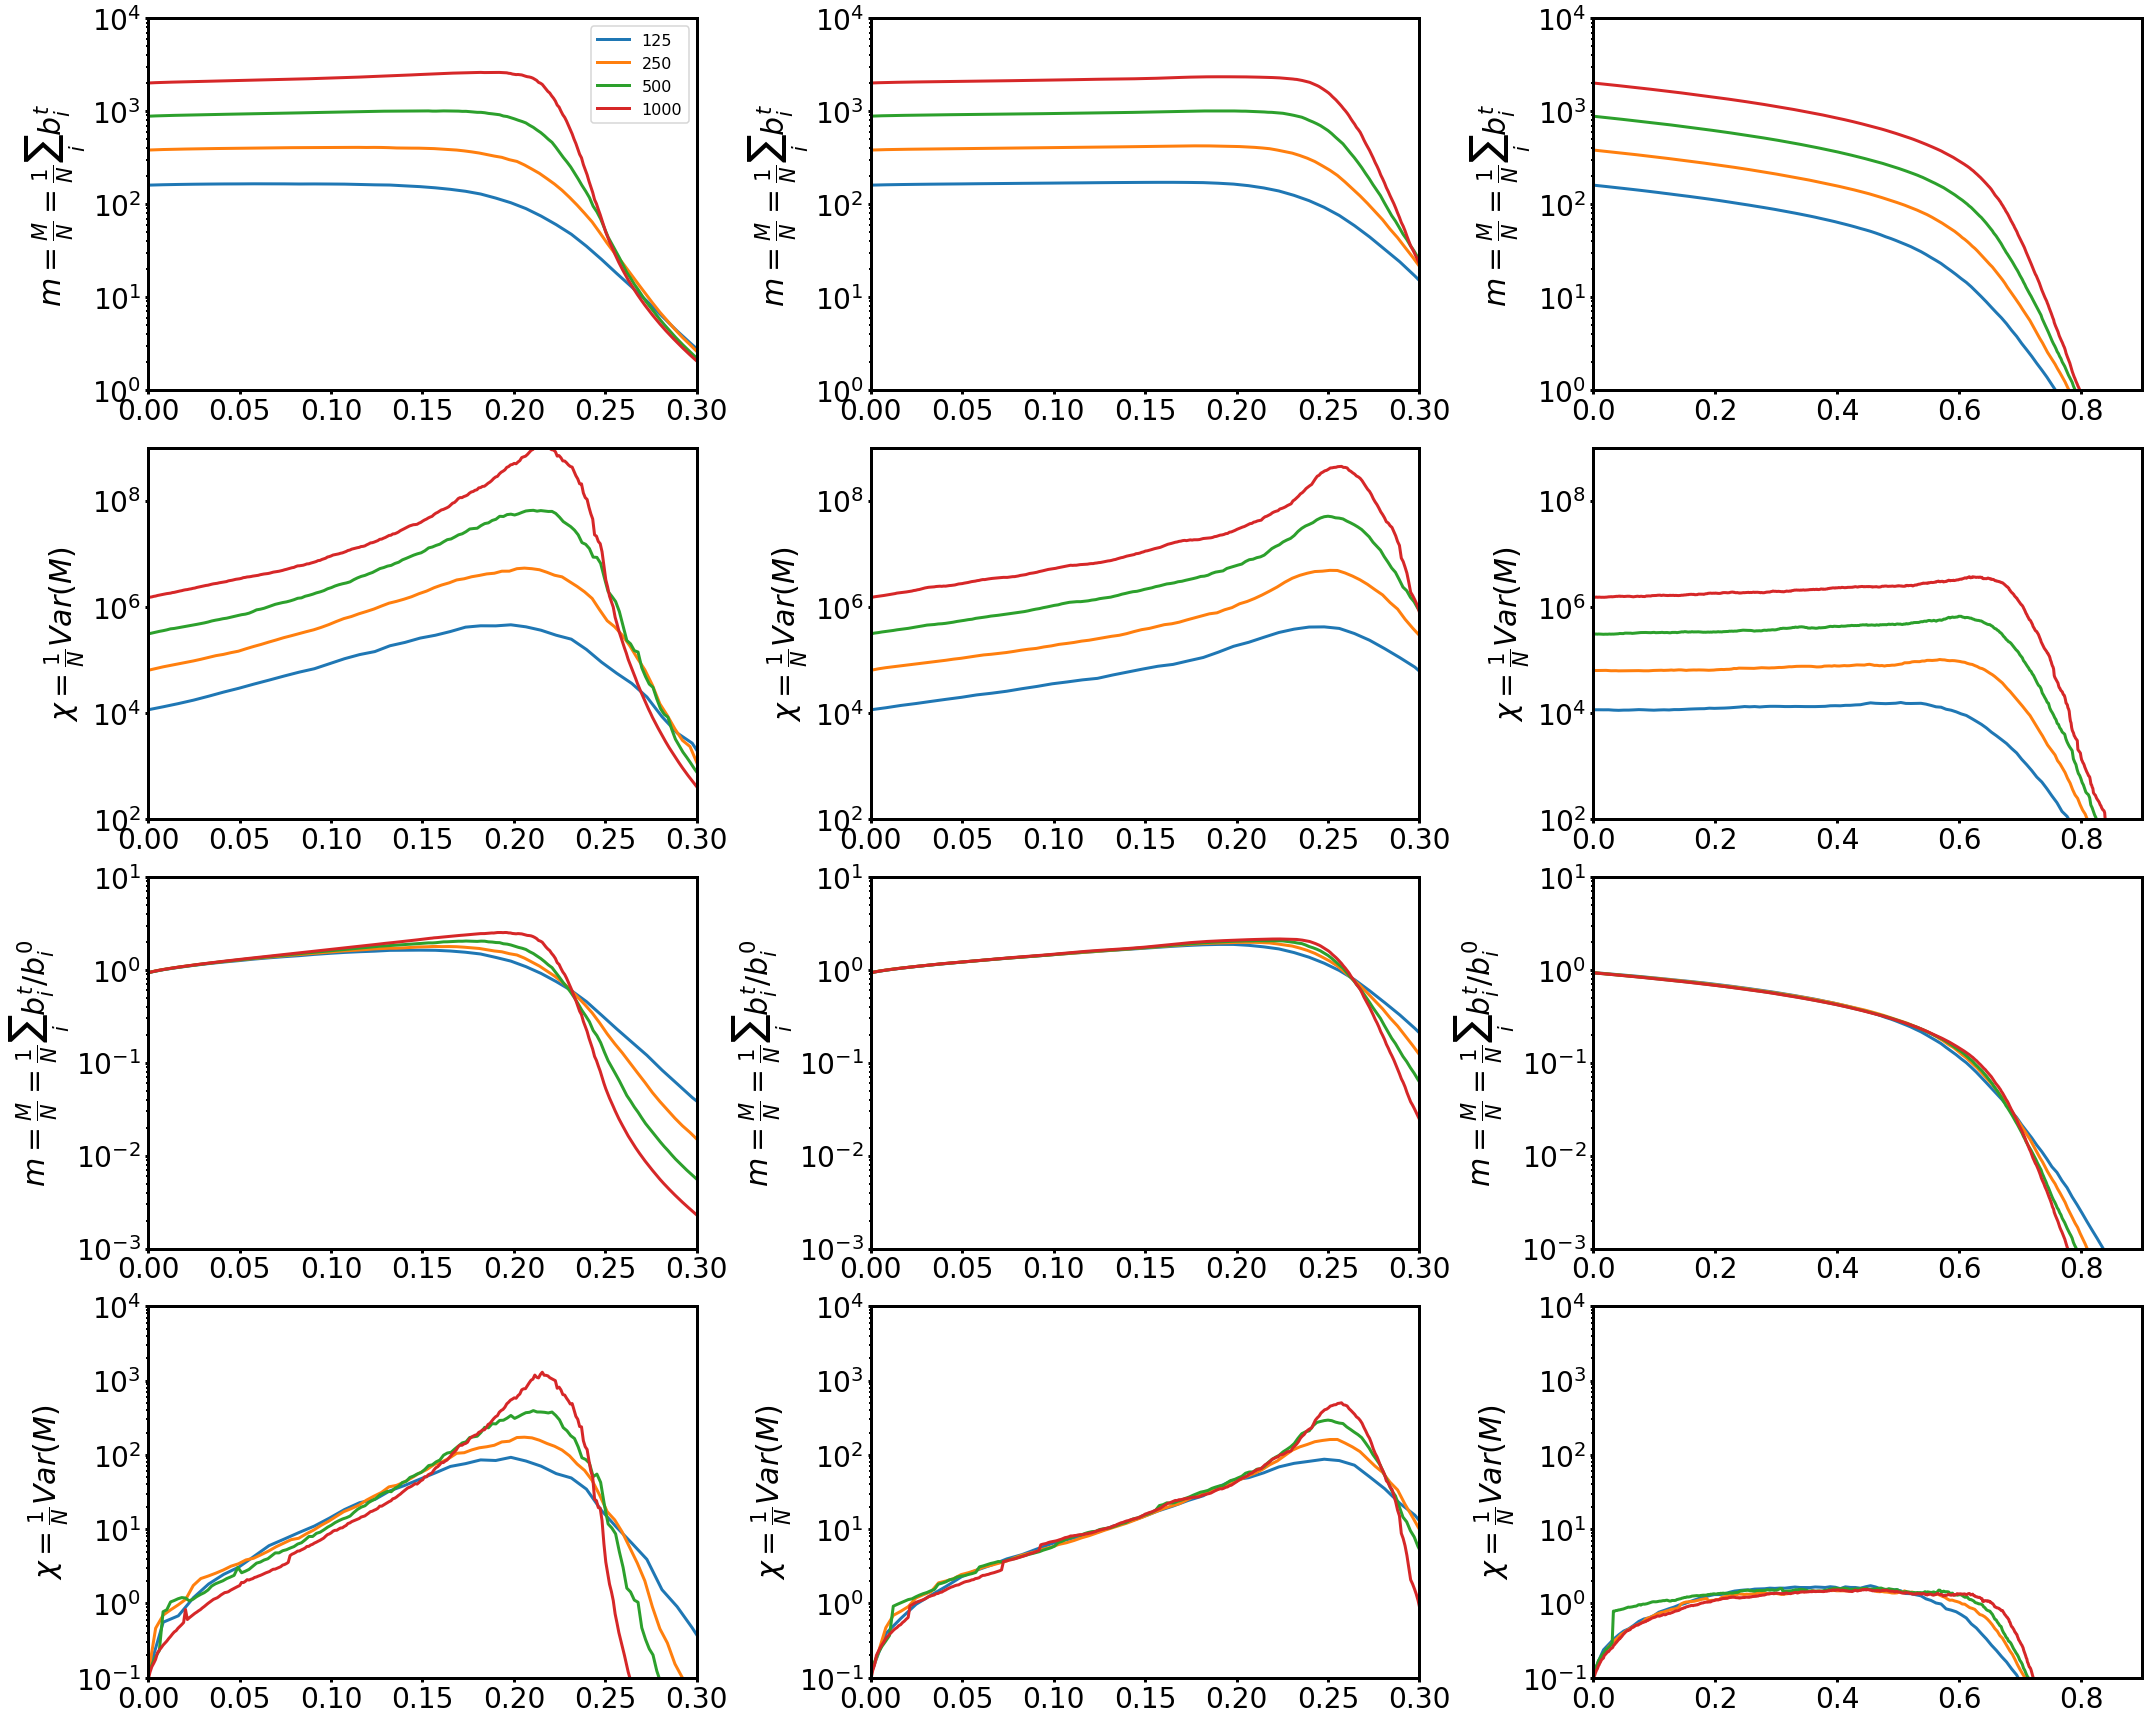

In [290]:
xlims = [(0, 0.3), (0, 0.3), (0, 0.9)]

ncols = 3
nrows = 4
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, attack in enumerate(attacks):
        
    for N in N_values:
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
           
        ax = axes[0][i]
        ax.set_ylabel(r'$M = \sum_i b_i^t$')
        ax.set_ylabel(r'$m = \frac{M}{N} = \frac{1}{N} \sum_i b_i^t$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_spin_sums[0][N][attack][:Ngcc0] / Ngcc0
        ax.set_xlim(xlims[i])
        ax.set_ylim(1, 10000)
        ax.set_yscale('log')
        if i == 0:
            ax.plot(X, Y, label=N)   
            ax.legend(loc='best', fontsize=16)
        else:
            ax.plot(X, Y)   
        
        ax = axes[1][i]
        ax.set_ylabel(r'$\chi = \frac{1}{N} Var(M)$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = var_spin_sums[0][N][attack][:Ngcc0]  / Ngcc0
        ax.set_xlim(xlims[i])
        ax.set_ylim(100, 10E8)
        ax.set_yscale('log')
        ax.plot(X, Y)  

        ax = axes[2][i]
        ax.set_ylabel(r'$M = \sum_i b_i^t / b_i^0$')
        ax.set_ylabel(r'$m = \frac{M}{N} = \frac{1}{N} \sum_i b_i^t / b_i^0$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_spin_sums[1][N][attack][:Ngcc0] / Ngcc0
        ax.set_xlim(xlims[i])
        ax.set_ylim(0.001, 10)
        ax.set_yscale('log')
        ax.plot(X, Y)   

        ax = axes[3][i]
        ax.set_ylabel(r'$\chi = \frac{1}{N} Var(M)$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = var_spin_sums[1][N][attack][:Ngcc0] / Ngcc0
        ax.set_xlim(xlims[i])
        ax.set_ylim(0.1, 10000)
        ax.set_yscale('log')
        ax.plot(X, Y)  
        
        if False:
            ax = axes[4][i]
            ax.set_ylabel(r'$M = \sum_i b_i^{t+1} / b_i^{t}$')
            ax.set_ylabel(r'$m = \frac{M}{N} = \frac{1}{N} \sum_i b_i^{t+1} / b_i^{t}$')
            ax.set_xlabel('')
            X = np.arange(Ngcc0) / Ngcc0
            Y = mean_spin_sums[2][N][attack][:Ngcc0] / Ngcc0
            ax.set_xlim(xlims[i])
            ax.set_ylim(0.1, 1000)
            ax.plot(X, Y)   

            ax = axes[5][i]
            ax.set_ylabel(r'$\chi = \frac{1}{N} Var(M)$')
            ax.set_xlabel('')
            X = np.arange(Ngcc0) / Ngcc0
            Y = var_spin_sums[2][N][attack][:Ngcc0] / Ngcc0
            ax.set_xlim(xlims[i])
            ax.set_yscale('log')
            ax.plot(X, Y)  

            ax = axes[6][i]
            ax.set_ylabel(r'$M = \sum_i \log \left( \frac{b_i^t + 1}{\langle b^t \rangle + 1} \right)$')
            ax.set_ylabel(r'$m = \frac{M}{N} = \frac{1}{N} \sum_i \log \left( \frac{b_i^t + 1}{\langle b^t \rangle + 1} \right)$')
            ax.set_xlabel('')
            X = np.arange(Ngcc0) / Ngcc0
            Y = mean_spin_sums[3][N][attack][:Ngcc0] / Ngcc0
            ax.set_xlim(xlims[i])
            ax.plot(X, Y)   

            ax = axes[7][i]
            ax.set_ylabel(r'$\chi = \frac{1}{N} Var(M)$')
            ax.set_xlabel('')
            X = np.arange(Ngcc0) / Ngcc0
            Y = var_spin_sums[3][N][attack][:Ngcc0] / Ngcc0
            ax.set_xlim(xlims[i])
            ax.set_yscale('log')
            ax.plot(X, Y)  


            ax = axes[8][i]
            ax.set_ylabel(r'$M = \sum_i \tanh \left( \frac{b_i^t}{\langle b^t \rangle} \right)$')
            ax.set_ylabel(r'$m = \frac{M}{N} = \frac{1}{N} \sum_i \tanh \left( \frac{b_i^t}{\langle b^t \rangle} \right)$')
            ax.set_xlabel('')
            X = np.arange(Ngcc0) / Ngcc0
            Y = mean_spin_sums[4][N][attack][:Ngcc0] / Ngcc0
            ax.set_xlim(xlims[i])
            ax.plot(X, Y)   

            ax = axes[9][i]
            ax.set_ylabel(r'$\chi = \frac{1}{N} Var(M)$')
            ax.set_xlabel('')
            X = np.arange(Ngcc0) / Ngcc0
            Y = var_spin_sums[4][N][attack][:Ngcc0] / Ngcc0
            ax.set_xlim(xlims[i])
            ax.set_yscale('log')
            ax.plot(X, Y) 


plt.tight_layout()
fig_base_name = 'ER_orderParams'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

### Btw distribution parameters

/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in true_divide


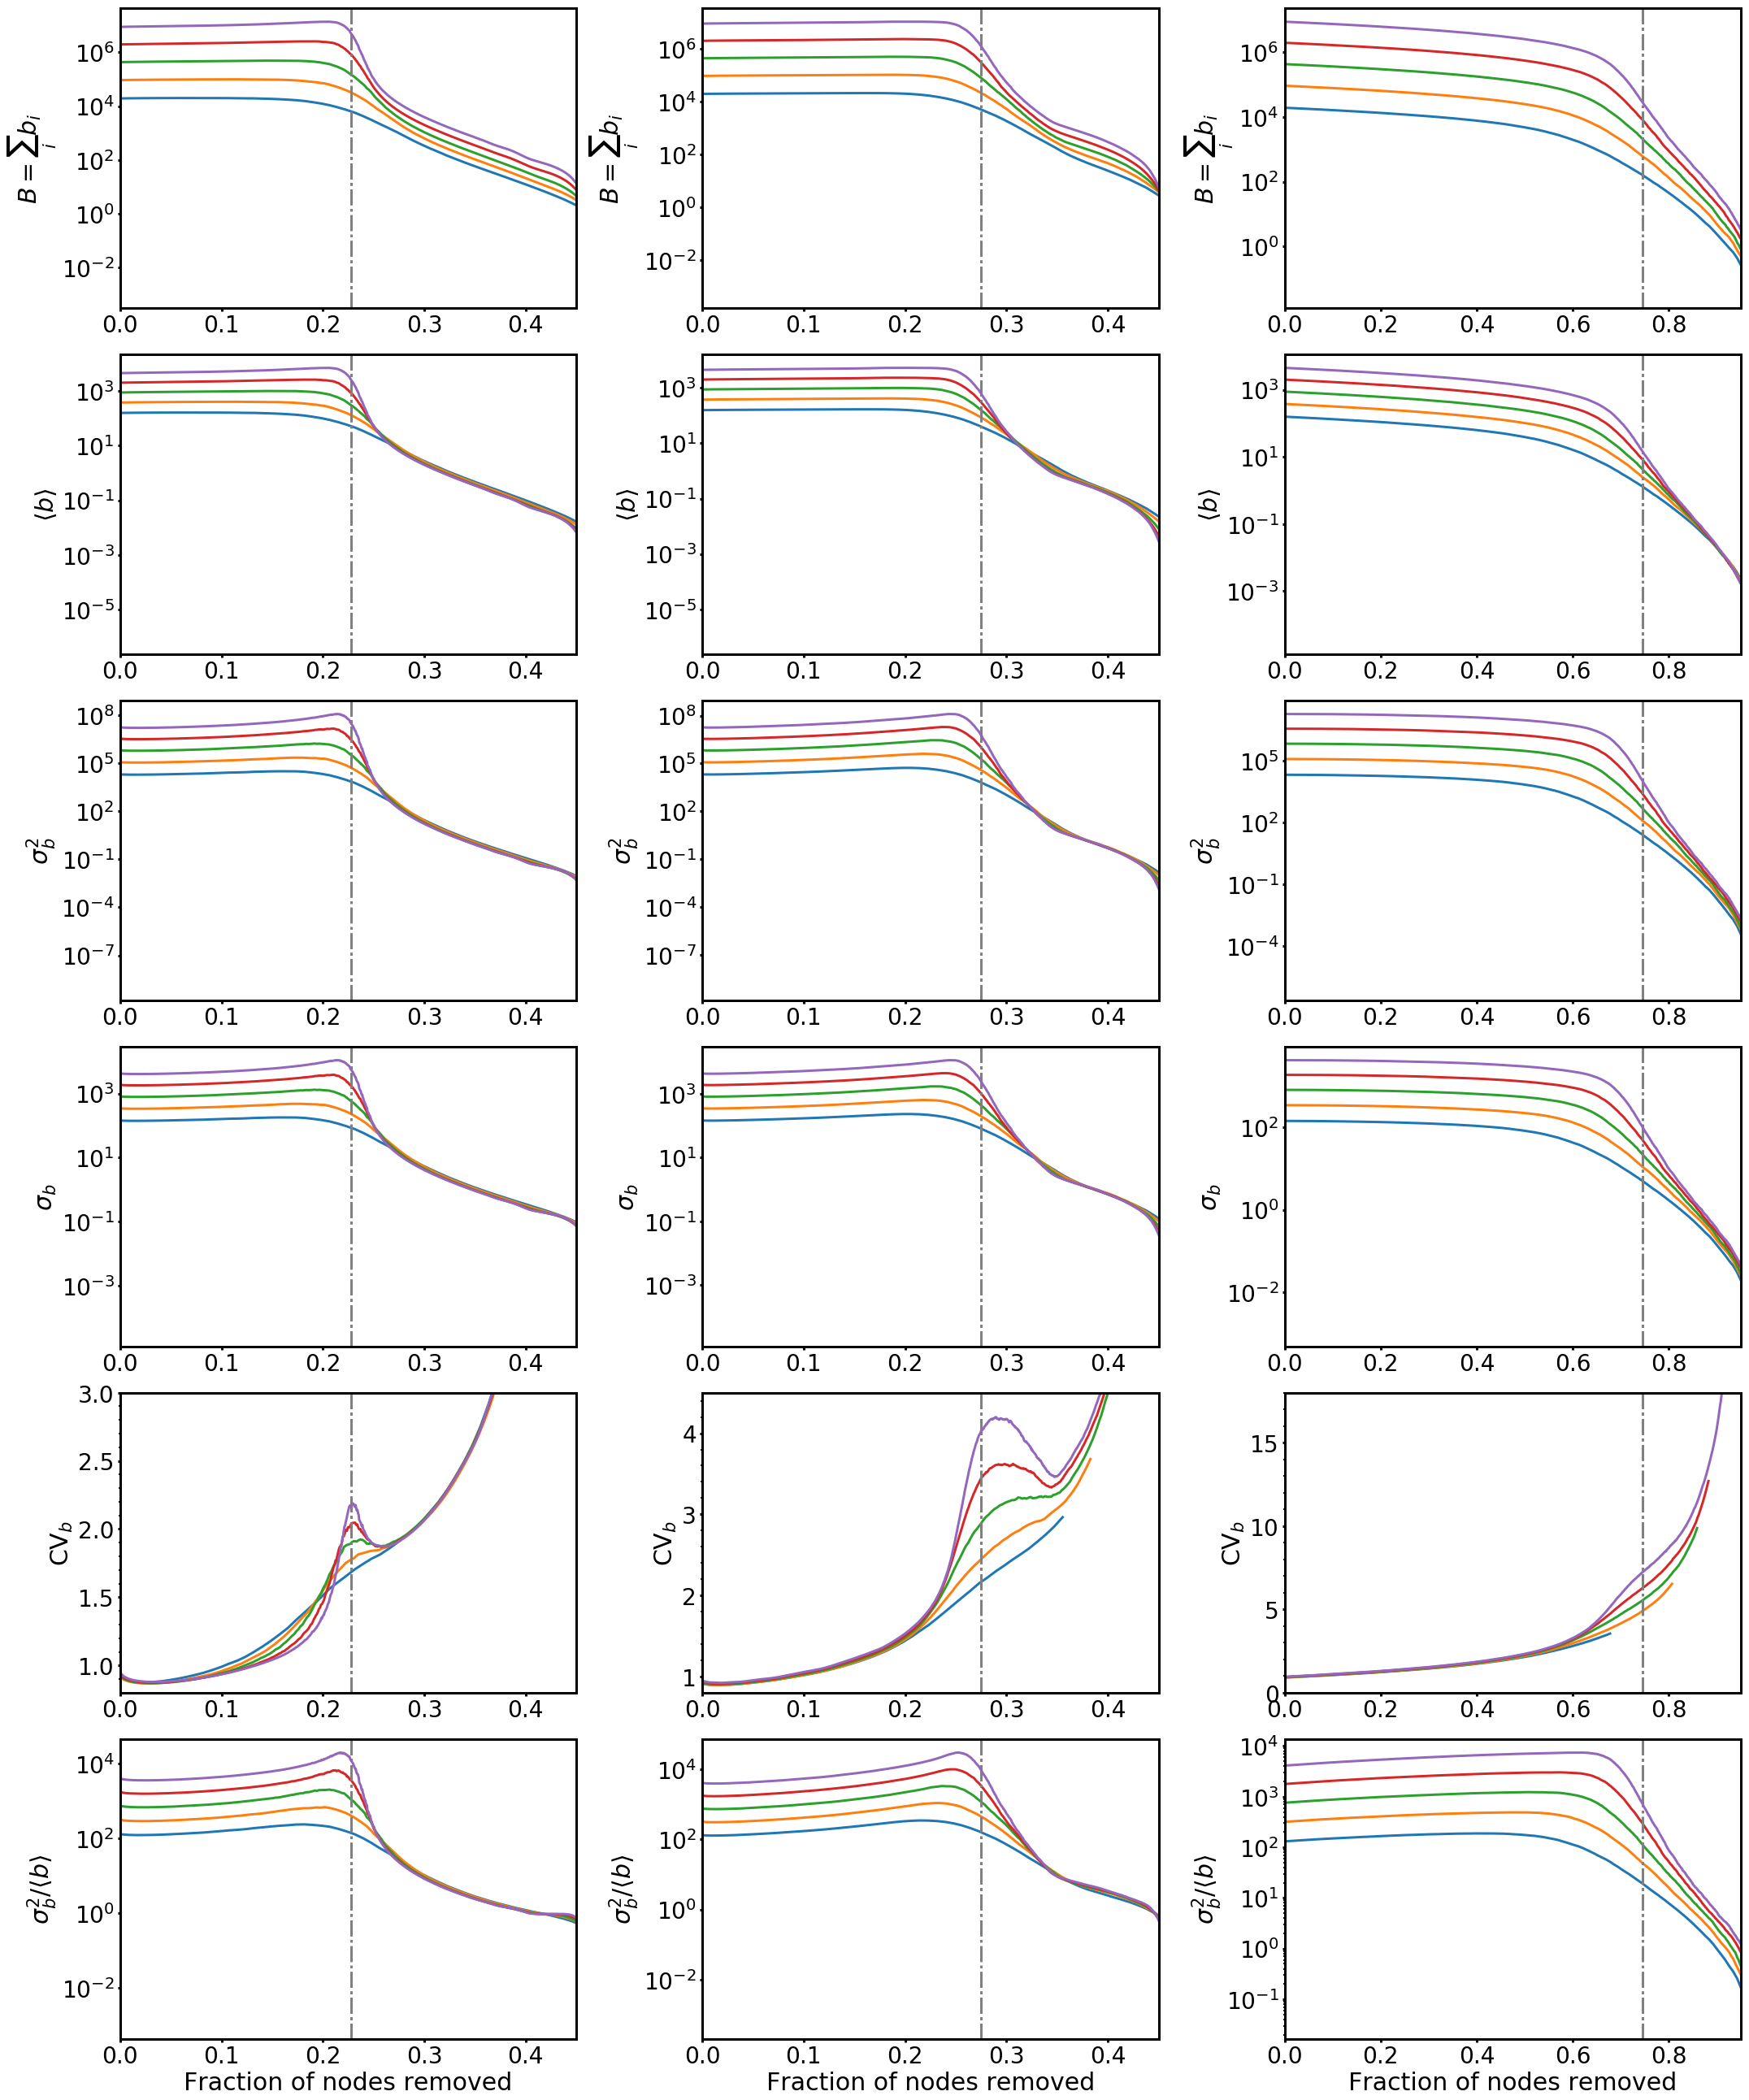

In [261]:
vlines = [0.228, 0.275, 0.745]

ylims = [(0.8, 3), (0.8, 4.5), (0, 18)]

ncols = 3
nrows = 6
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, attack in enumerate(attacks):
        
    for N in N_values:
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
                     
        ax = axes[0][i]
        ax.set_ylabel(r'$B = \sum_i b_i$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_sum[N][attack][:Ngcc0]
        ax.set_xlim(xlims[i])
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.set_yscale('log')
        ax.plot(X, Y)            
       
        
        ax = axes[1][i]
        ax.set_ylabel(r'$\langle b \rangle$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_mean[N][attack][:Ngcc0] 
        ax.set_xlim(xlims[i])
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.set_yscale('log')
        ax.plot(X, Y)

        ax = axes[2][i]
        ax.set_ylabel(r'$\sigma^2_b$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_std[N][attack][:Ngcc0]**2 
        ax.set_xlim(xlims[i])
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.set_yscale('log')
        ax.plot(X, Y)
        
        ax = axes[3][i]
        ax.set_ylabel(r'$\sigma_b$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_std[N][attack][:Ngcc0]
        ax.set_xlim(xlims[i])
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.set_yscale('log')
        ax.plot(X, Y)
        
        ax = axes[4][i]
        ax.set_ylabel(r'$\mathrm{CV}_b$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_CV[N][attack][:Ngcc0]
        ax.set_xlim(xlims[i])
        ax.set_ylim(ylims[i])
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.plot(X, Y)
        
        ax = axes[5][i]
        ax.set_ylabel(r'$\sigma^2_b/\langle b \rangle$')
        ax.set_xlabel('Fraction of nodes removed')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_std[N][attack][:Ngcc0]**2 / mean_btw_mean[N][attack][:Ngcc0]
        ax.set_xlim(xlims[i])
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.set_yscale('log')
        ax.plot(X, Y)

plt.tight_layout()
fig_base_name = 'Btw_dist_params_ER'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

### Difference between attacks

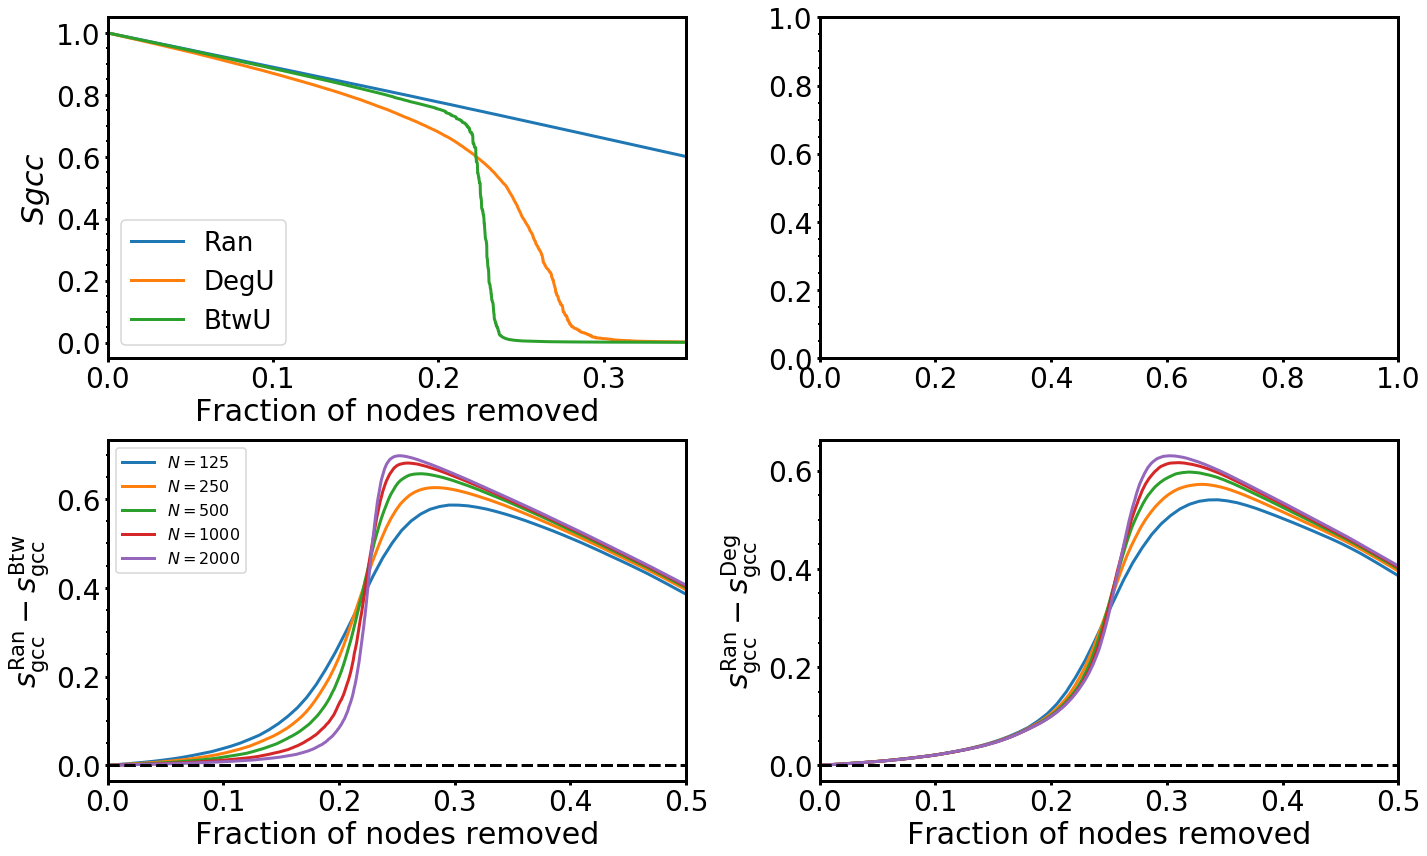

In [97]:
ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

x_lims = [(0, 0.5), (0, 0.5), (0, 1)]

N = 8000
Ngcc0 = int(mean_Ngcc_values[N][attack][0])

ax = axes[0][0]
ax.set_ylabel(r'$Sgcc$')
ax.set_xlabel('Fraction of nodes removed')
X = np.arange(Ngcc0) / Ngcc0
Y3 = mean_Ngcc_values[N]['BtwU'][:Ngcc0] / Ngcc0
Y2 = mean_Ngcc_values[N]['DegU'][:Ngcc0] / Ngcc0
Y1 = mean_Ngcc_values[N]['Ran'][:Ngcc0] / Ngcc0
ax.set_xlim(0, 0.35)
ax.plot(X, Y1, label='Ran')
ax.plot(X, Y2, label='DegU')
ax.plot(X, Y3, label='BtwU')
ax.legend(loc='best')
for i, attack in enumerate(attacks):
    if i > 1:
        continue
        
    for N in N_values:
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        ax = axes[1][i]
        ax.set_xlabel('Fraction of nodes removed')
        
        line_x = np.arange(0, 1.01, Ngcc0)
        line_y = 1 - line_x
        
        X = np.arange(Ngcc0) / Ngcc0
        Y = (mean_Ngcc_values[N]['Ran'][:Ngcc0] / Ngcc0) - (mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0) 
        ax.set_xlim(x_lims[i])
        
        if i == 0:
            ax.set_ylabel(r'$s^{\mathrm{Ran}}_{\mathrm{gcc}} - s^{\mathrm{Btw}}_{\mathrm{gcc}} $')
            ax.plot(X, Y, label=r'$N = $' + '{}'.format(N))
            ax.legend(loc='best', fontsize=16)
        elif i == 1:
            ax.set_ylabel(r'$s^{\mathrm{Ran}}_{\mathrm{gcc}} - s^{\mathrm{Deg}}_{\mathrm{gcc}} $')
            ax.plot(X, Y)
        ax.axhline(0, linestyle='--', color='k')
        #ax.set_xlim(0.20, 0.25)
        

        #ax.set_xlim(0.1, 0.3)

plt.tight_layout()

fig_base_name = 'Percolation2_ER'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

### Modularity analysis

In [125]:
net_dir_name = '../networks/ER'

N_values = [125, 250, 500, 1000, 2000, 4000, 8000]
p_values = [0.032, 0.016, 0.008, 0.004, 0.002, 0.001, 0.0005]
seeds_by_N = [range(1000), range(100), range(100), range(58), range(86), range(10), range(3)]

attacks = ['BtwU', 'DegU', 'Ran']


q_values = {}
mean_q_values = {}
std_q_values = {}

Ngcc_values = {}
mean_Ngcc_values = {}
    
for N, p, seeds in zip(N_values, p_values, seeds_by_N):

    q_values[N] = {}    
    mean_q_values[N] = {}
    std_q_values[N] = {}
    
    Ngcc_values[N] = {}
    mean_Ngcc_values[N] = {}

    for attack in attacks:
        
        q_values[N][attack] = []
        
        Ngcc_values[N][attack] = []
        
        for seed in seeds:
                       
            network = 'ER_N{}_p{}_{:05d}'.format(N, p, seed)
            network_file = network + '.txt'
            full_network_path = os.path.join(net_dir_name, network, network_file)
            
            attack_dir_name = os.path.join(net_dir_name, network, attack)
            
            full_q_values_file_name  = os.path.join(attack_dir_name, 'q_values.txt')
            data = np.loadtxt(full_q_values_file_name)
            
            _q_values = data[:,0]
            _Ngcc_values = data[:,1]
            
            q_values[N][attack].append(_q_values)
            Ngcc_values[N][attack].append(_Ngcc_values)

        mean_q_values[N][attack] = np.mean(q_values[N][attack], axis=0)
        std_q_values[N][attack] = np.std(q_values[N][attack], axis=0)
        
        mean_Ngcc_values[N][attack] = np.mean(Ngcc_values[N][attack], axis=0)

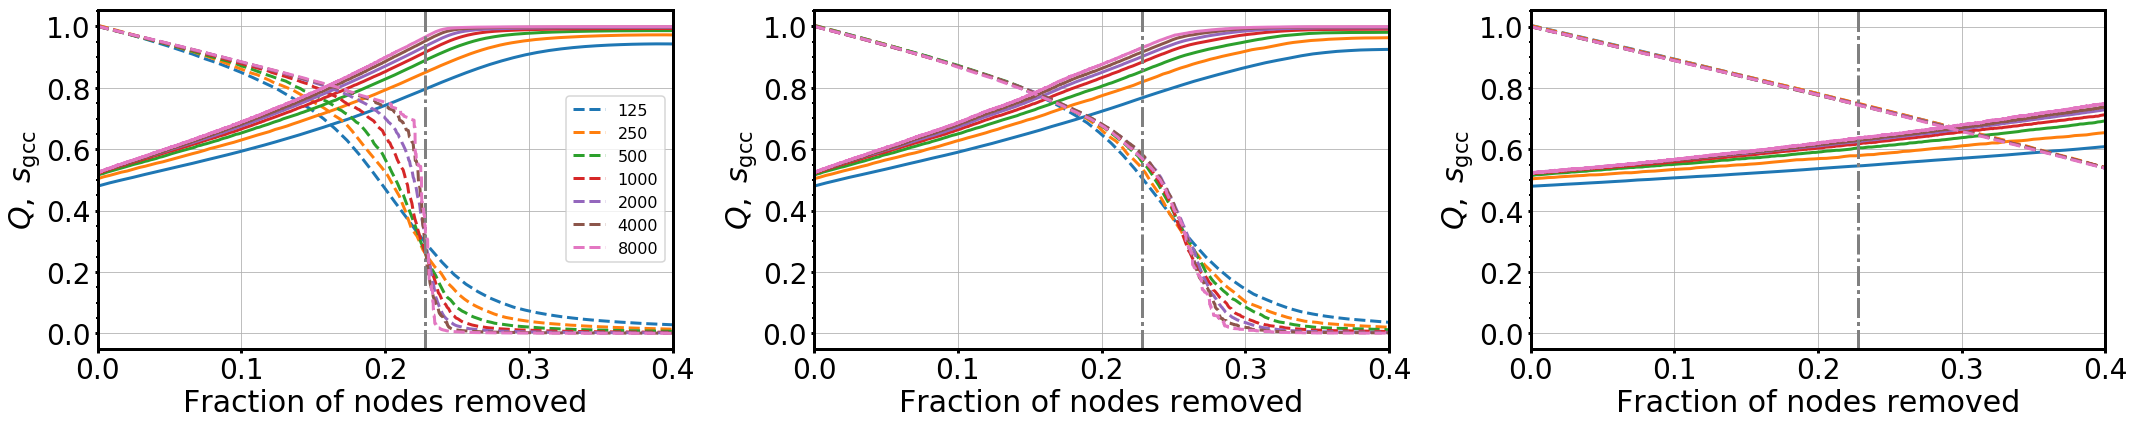

In [126]:
vlines = [0.228, 0.275, 0.745]

ncols = 3
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, attack in enumerate(attacks):
    ax = axes[i]
    for j, N in enumerate(N_values):
        
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_q_values[N][attack][:Ngcc0]
        Y_err = std_q_values[N][attack][:Ngcc0]
        ax.plot(X, Y, color=colors[j])
        #ax.fill_between(X, Y-Y_err, Y+Y_err, alpha=0.3)
        #ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.axvline(vlines[0], linestyle='-.', color='grey')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0
        if i == 0:
            ax.plot(X, Y, linestyle='--', color=colors[j], label=N)
            ax.legend(loc='best', fontsize=16)
        else:
            ax.plot(X, Y, linestyle='--', color=colors[j])
        ax.set_xlim(0, 0.4)
        ax.grid(True)
        ax.set_ylabel(r'$Q,\; s_{\mathrm{gcc}}$')
        ax.set_xlabel('Fraction of nodes removed')
        
plt.tight_layout()
fig_base_name = 'ER_modularity'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

In [99]:
import pickle
import bz2

def counterToList(counter):

    try:
        counter[0][0]
    except:
        return [counter[0]]

    lst = []
    for s, ns in counter:
        lst += [s]*ns
    return sorted(lst, reverse=True)[1:]

def get_ccdf(data):
    """
    Plot the complementary cumulative distribution function
    (1-CDF(x)) based on the data on the axes object.
    
    Note that this way of computing and plotting the ccdf is not
    the best approach for a discrete variable, where many
    observations can have exactly same value!
    """
    # Note that, here we use the convention for presenting an 
    # empirical 1-CDF (ccdf) as discussed above
    sorted_vals = np.sort(np.unique(data))
    ccdf = np.zeros(len(sorted_vals))
    n = float(len(data))
    for i, val in enumerate(sorted_vals):
        ccdf[i] = np.sum(data >= val)/n
    return sorted_vals, ccdf

N = 2000
p = 0.002
seeds = range(1000)

f_values_by_attack = {'BtwU': [0.15, 0.2, 0.22, 0.228, 0.25, 0.30],
                      'DegU': [0.20, 0.25, 0.27, 0.275, 0.3, 0.35],
                      'Ran':  [0.5, 0.7, 0.72, 0.75, 0.8, 0.85]}

all_comp_sizes_dict = {}
for attack in attacks: 
    print(attack)
    all_comp_sizes_dict[attack] = {}
    all_comp_sizes_lst = []
    
    for f_value in f_values_by_attack[attack]:
        print(f_value)
        all_comp_sizes_dict[attack][f_value] = []
        for seed in seeds:     

            network = 'ER_N{}_p{}_{:05d}'.format(N, p, seed)
            #print(network)
            network_file = network + '.txt'
            full_network_path = os.path.join(net_dir_name, network, network_file)

            attack_dir_name = os.path.join(net_dir_name, network, attack)
            
            comp_sizes_file  = os.path.join(attack_dir_name, 'componentSizes.pickle.bz2')
            with bz2.BZ2File(comp_sizes_file, 'r') as f:
                comp_sizes_values = pickle.load(f)
                
            comp_sizes = comp_sizes_values[int(N*f_value)]
            comp_sizes_lst = counterToList(comp_sizes)
            if len(comp_sizes_lst) == 1:
                continue

            all_comp_sizes_dict[attack][f_value] += comp_sizes_lst

BtwU
0.15
0.2
0.22
0.228
0.25
0.3
DegU
0.2
0.25
0.27
0.275
0.3
0.35
Ran
0.5
0.7
0.72
0.75
0.8
0.85


In [100]:
with open(os.path.join(net_dir_name, 'cluster_size_data.pickle'), 'wb') as f:
    pickle.dump(all_comp_sizes_dict, f)

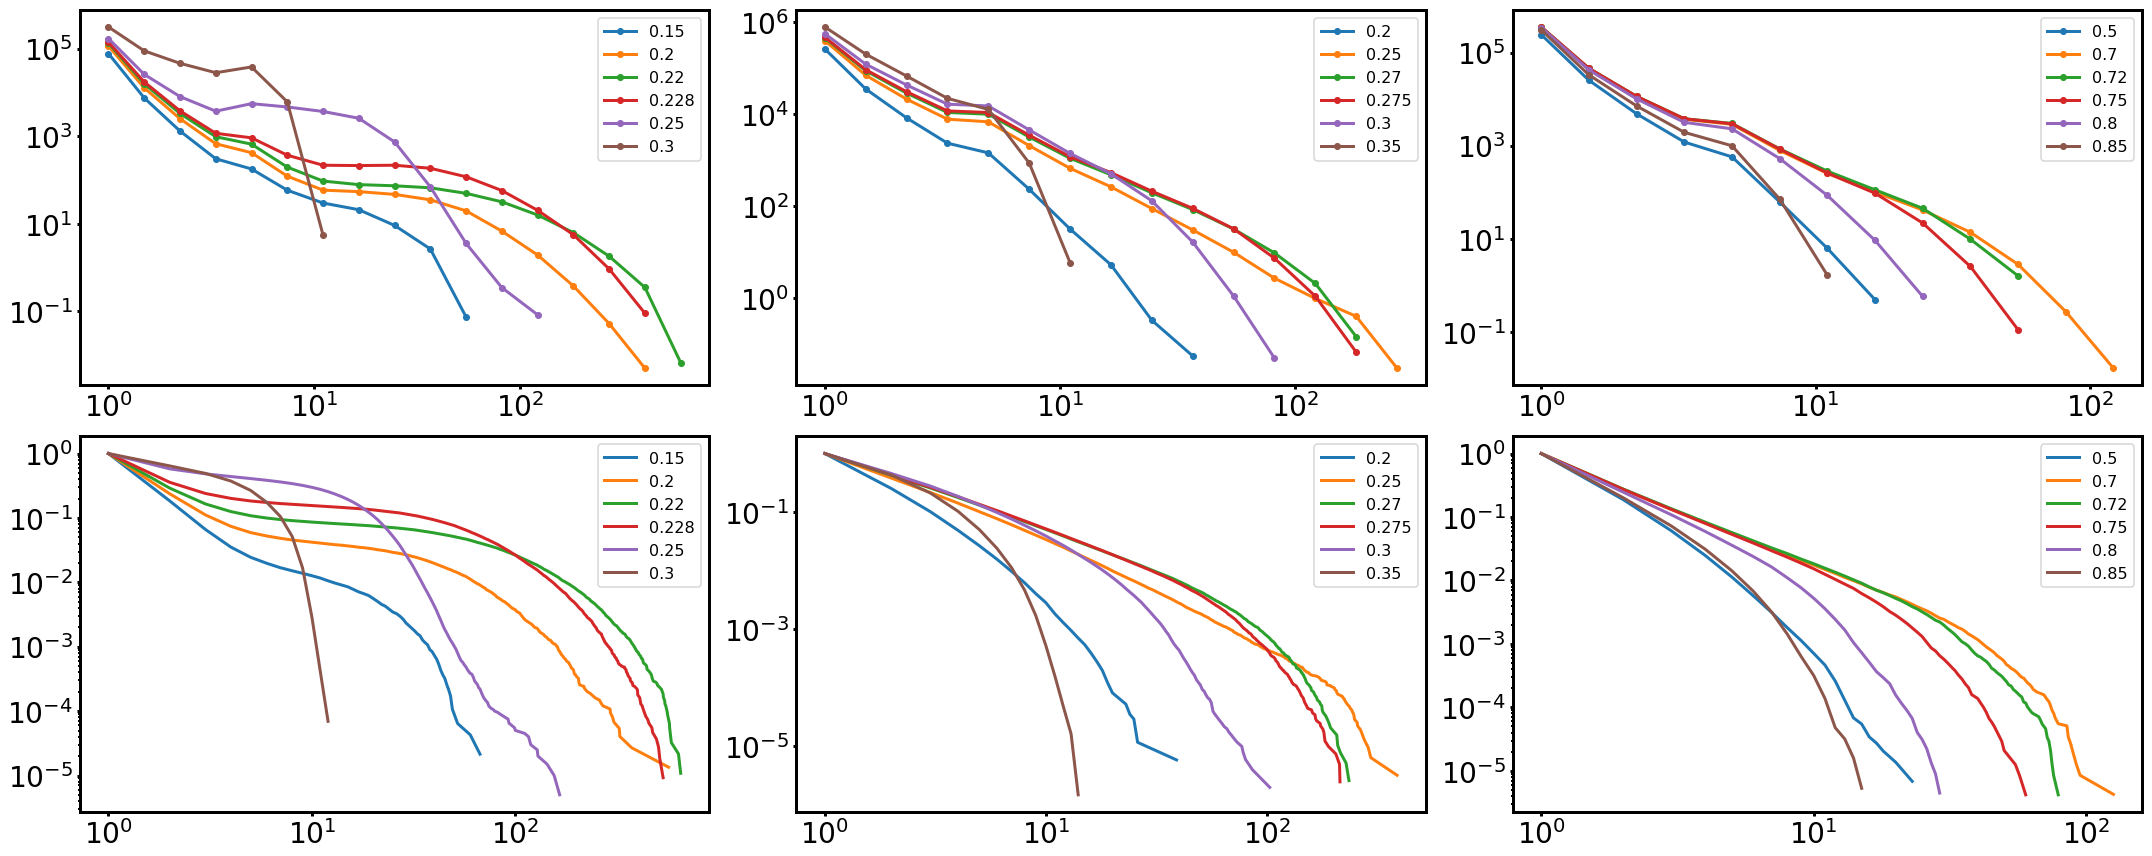

In [381]:
# log-scaled bins
bins = np.logspace(0, np.log10(N), 20)
widths = (bins[1:] - bins[:-1])

ncols = 3
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, attack in enumerate(attacks):

    ax0 = axes[0][i]
    ax1 = axes[1][i]
    for f_value in f_values_by_attack[attack]:
        Y = all_comp_sizes_dict[attack][f_value]
        hist = np.histogram(Y, bins=bins)
        hist_norm = hist[0]/widths
        hist_norm[hist_norm==0] = np.NaN
        ax0.plot(bins[:-1], hist_norm, 'o-', label=f_value)
        
        sorted_vals, ccdf = get_ccdf(Y)
        ax1.plot(sorted_vals, ccdf, '-', label=f_value)     
        
    ax0.legend(loc='best', fontsize=16)
    ax0.set_xscale('log')
    ax0.set_yscale('log')

    ax1.legend(loc='best', fontsize=16)
    ax1.set_xscale('log')
    ax1.set_yscale('log')

plt.tight_layout()
plt.show()

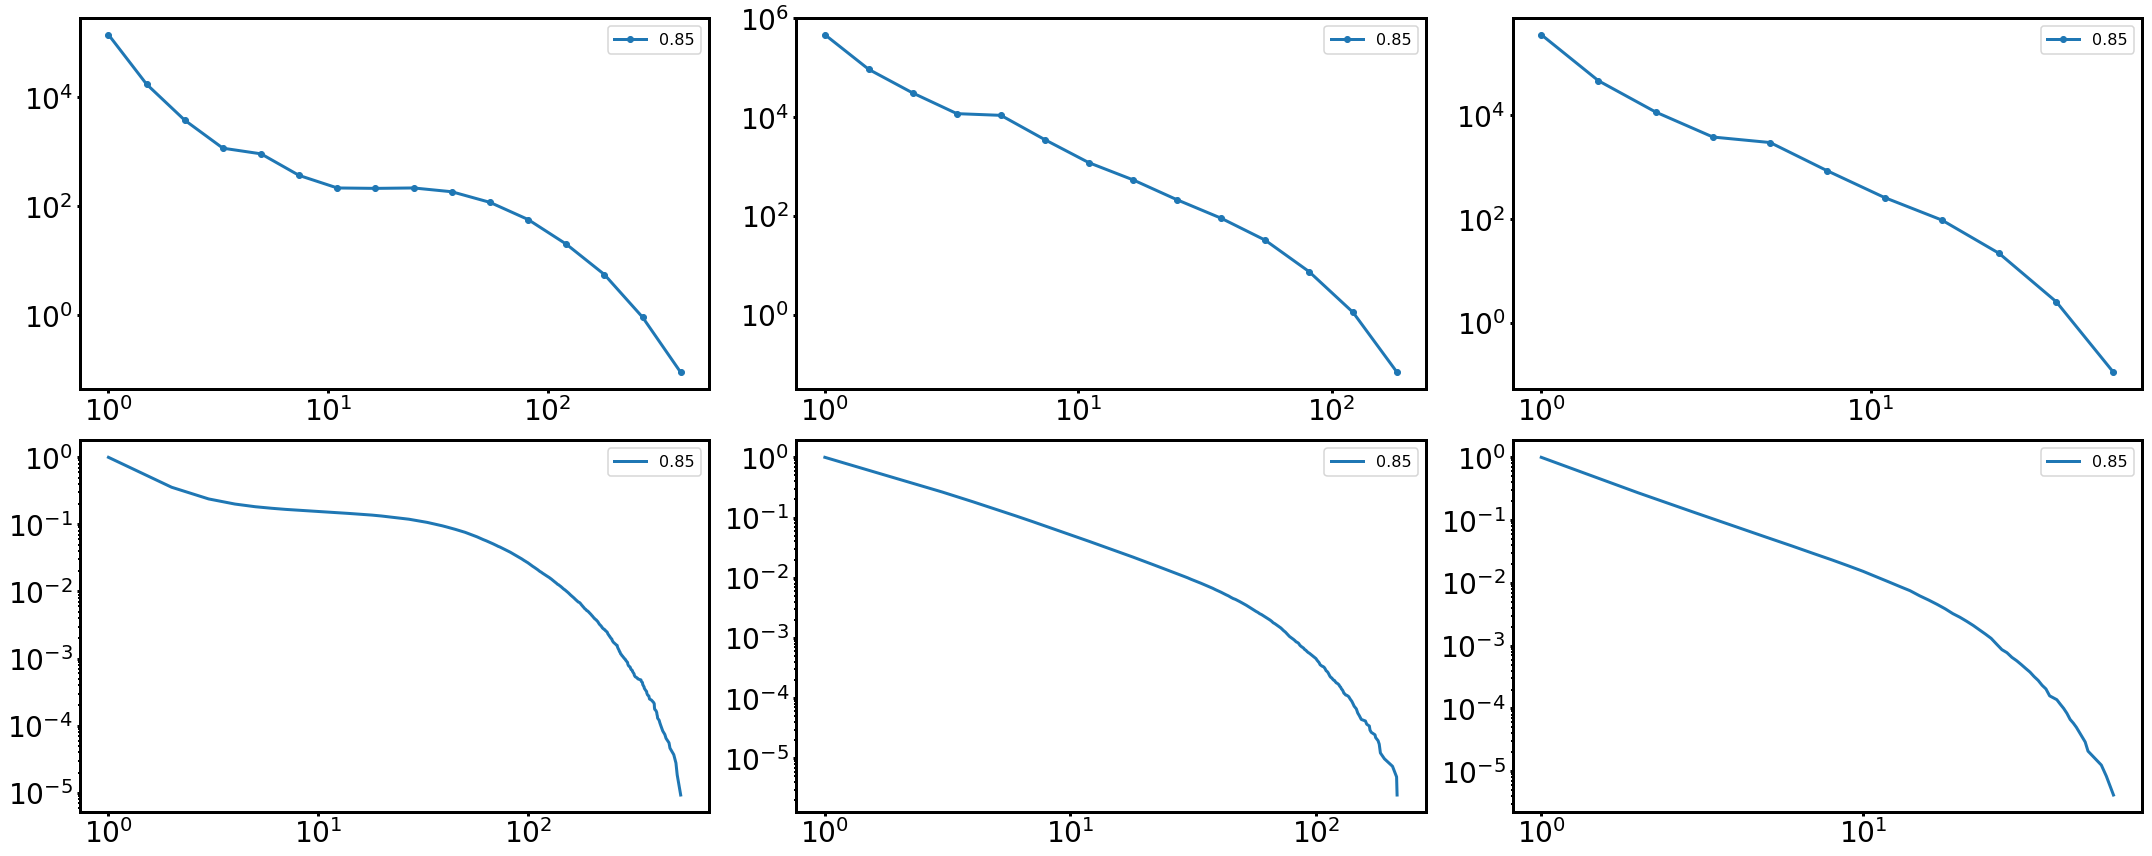

In [396]:
# log-scaled bins
bins = np.logspace(0, np.log10(N), 20)
widths = (bins[1:] - bins[:-1])

ncols = 3
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

crit_f_values = [0.228, 0.275, 0.75]
for i, attack in enumerate(attacks):

    ax0 = axes[0][i]
    ax1 = axes[1][i]

    f_value
    Y = all_comp_sizes_dict[attack][crit_f_values[i]]
    hist = np.histogram(Y, bins=bins)
    hist_norm = hist[0]/widths
    hist_norm[hist_norm==0] = np.NaN
    ax0.plot(bins[:-1], hist_norm, 'o-', label=f_value)

    sorted_vals, ccdf = get_ccdf(Y)
    ax1.plot(sorted_vals, ccdf, '-', label=f_value)     
        
    ax0.legend(loc='best', fontsize=16)
    ax0.set_xscale('log')
    ax0.set_yscale('log')

    ax1.legend(loc='best', fontsize=16)
    ax1.set_xscale('log')
    ax1.set_yscale('log')

plt.tight_layout()
plt.show()

In [47]:
N = 8000
p = 0.0005

f_values_by_attack = {'BtwU': [0, 0.15, 0.2, 0.22, 0.225, 0.228, 0.25, 0.30],
                      'DegU': [0, 0.20, 0.25, 0.27, 0.273, 0.275, 0.3, 0.35],
                      'Ran':  [0, 0.5, 0.7, 0.72, 0.75, 0.76, 0.8, 0.85]}

btw_values_dict = {}
for attack in attacks: 
    print(attack)

    btw_values_dict[attack] = {}
    for f_value in f_values_by_attack[attack]:
        print(f_value)
                
        network = 'ER_N{}_p{}_{:05d}'.format(N, p, 0)
        #print(network)
        network_file = network + '.txt'
        full_network_path = os.path.join(net_dir_name, network, network_file)

        attack_dir_name = os.path.join(net_dir_name, network, attack)               
        btw_matrix_file = os.path.join(attack_dir_name, 'btwMatrix.pickle.bz2')
        with bz2.BZ2File(btw_matrix_file, 'r') as f:
            btw_matrix = pickle.load(f)

        btw_values = btw_matrix[int(N*f_value)]  
        btw_values_dict[attack][f_value] = btw_values

BtwU
0


KeyboardInterrupt: 

KeyError: 0.8

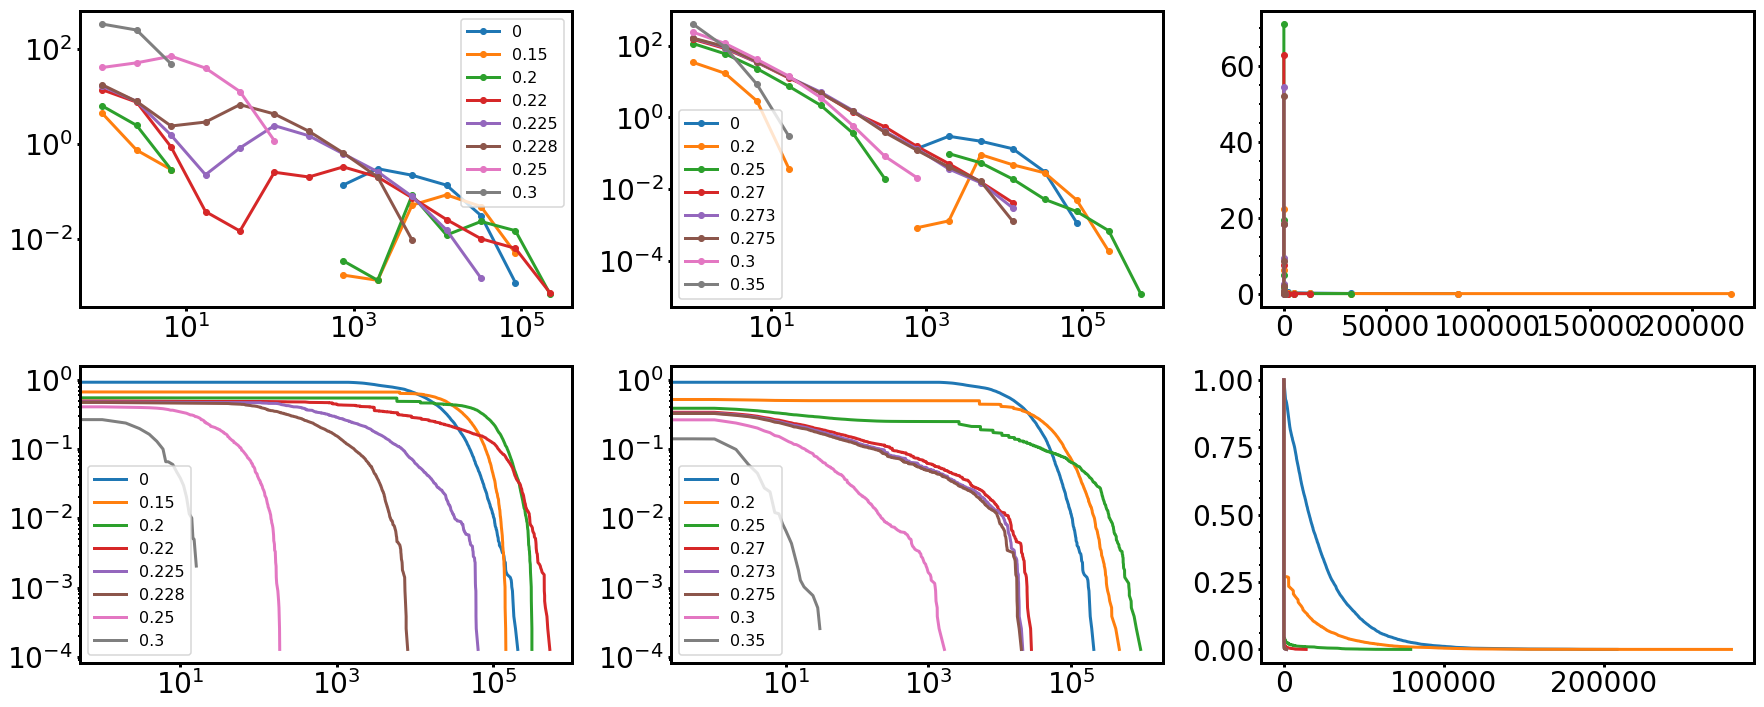

In [44]:
# log-scaled bins

#minb = np.min(btw_values)
#maxb = np.max(btw_values)

bins = np.logspace(0, np.log10(N**2), 20)
widths = (bins[1:] - bins[:-1])

ncols = 3
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, attack in enumerate(attacks):

    ax0 = axes[0][i]
    ax1 = axes[1][i]
    for f_value in f_values_by_attack[attack]:
        Y = btw_values_dict[attack][f_value]
        hist = np.histogram(Y, bins=bins)
        hist_norm = hist[0]/widths
        hist_norm[hist_norm==0] = np.NaN
        ax0.plot(bins[:-1], hist_norm, 'o-', label=f_value)
        
        sorted_vals, ccdf = get_ccdf(Y)
        ax1.plot(sorted_vals, ccdf, '-', label=f_value)     
        
    ax0.legend(loc='best', fontsize=16)
    ax0.set_xscale('log')
    ax0.set_yscale('log')

    ax1.legend(loc='best', fontsize=16)
    ax1.set_xscale('log')
    ax1.set_yscale('log')

plt.tight_layout()
plt.show()

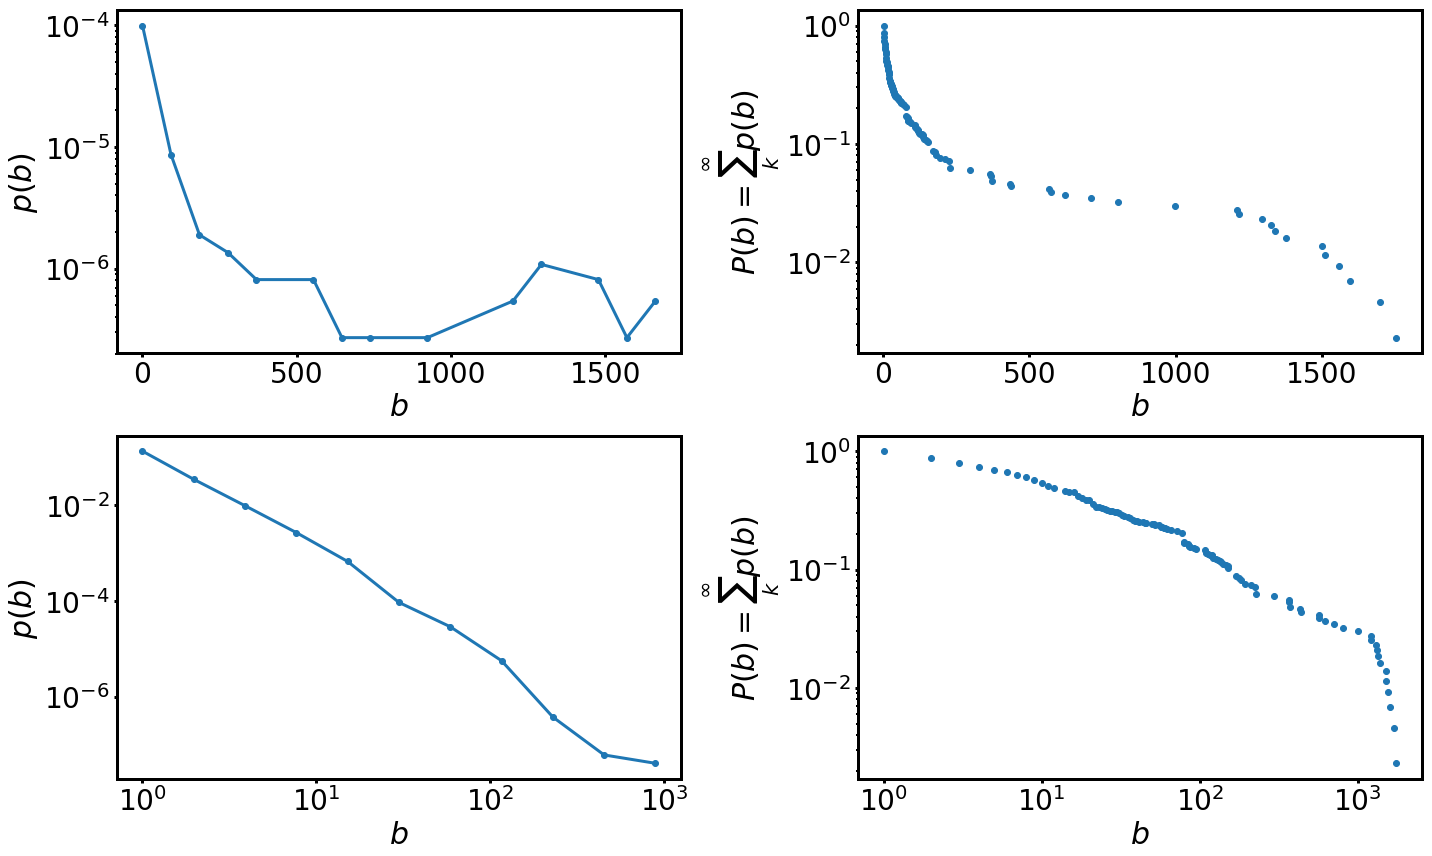

In [45]:
normalize = False
attack = 'Ran'
f_value = 0.75
btwSeq = btw_values_dict[attack][f_value]
mask = btwSeq > 0
btwSeq = btwSeq[mask]
if normalize:
    btwSeq = btwSeq / ((N-1) * (N-2) / 2)
    lower_cote = 1 / ((N-1) * (N-2) / 2)
    upper_cote = 1
else:
    btwSeq.astype('int')
    lower_cote = 1 
    upper_cote = (N-1) * (N-2) / 2

minb = min(btwSeq)
maxb = max(btwSeq)


# lin_hist = np.array(sorted(Counter(degSeq).items(), key=lambda x: x[0]))

ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i in range(2):
    
    if i == 0:
        bins = np.linspace(minb, maxb, 20)
        
    else:
    
        bins = np.logspace(np.log10(minb), np.log10(maxb), 12)
        #bins = np.exp2(np.arange(np.log2(minb), np.log2(maxb)))

    hist = np.histogram(btwSeq, bins=bins, density=True)
    widths = (bins[1:] - bins[:-1])
    hist_norm = hist[0]/widths
    hist_norm[hist_norm==0] = np.NaN

    ax = axes[i][0]
    mask = ~np.isnan(hist_norm)
    X = bins[:-1]
    X = X[mask]
    Y = hist_norm[mask]
    ax.plot(X, Y, 'o-')
    #ax.plot(*Counter(btwSeq))
    ax.set_yscale('log')
    if i == 1:
        ax.set_xscale('log')
    ax.set_xlabel('$b$')
    ax.set_ylabel('$p(b)$')


    ax = axes[i][1]
    sorted_vals, ccdf = get_ccdf(btwSeq)
    ax.plot(sorted_vals, ccdf, 'o')  
    ax.set_yscale('log')
    if i == 1:
        ax.set_xscale('log')
    ax.set_xlabel(r'$b$')
    ax.set_ylabel(r'$P(b) = \sum_k^{\infty}p(b)$')

plt.tight_layout()
#plt.savefig(figs_dir + '/pdf/btwSeq_' + network + '.pdf')
#plt.savefig(figs_dir + '/png/btwSeq_' + network + '.png')   
plt.show()

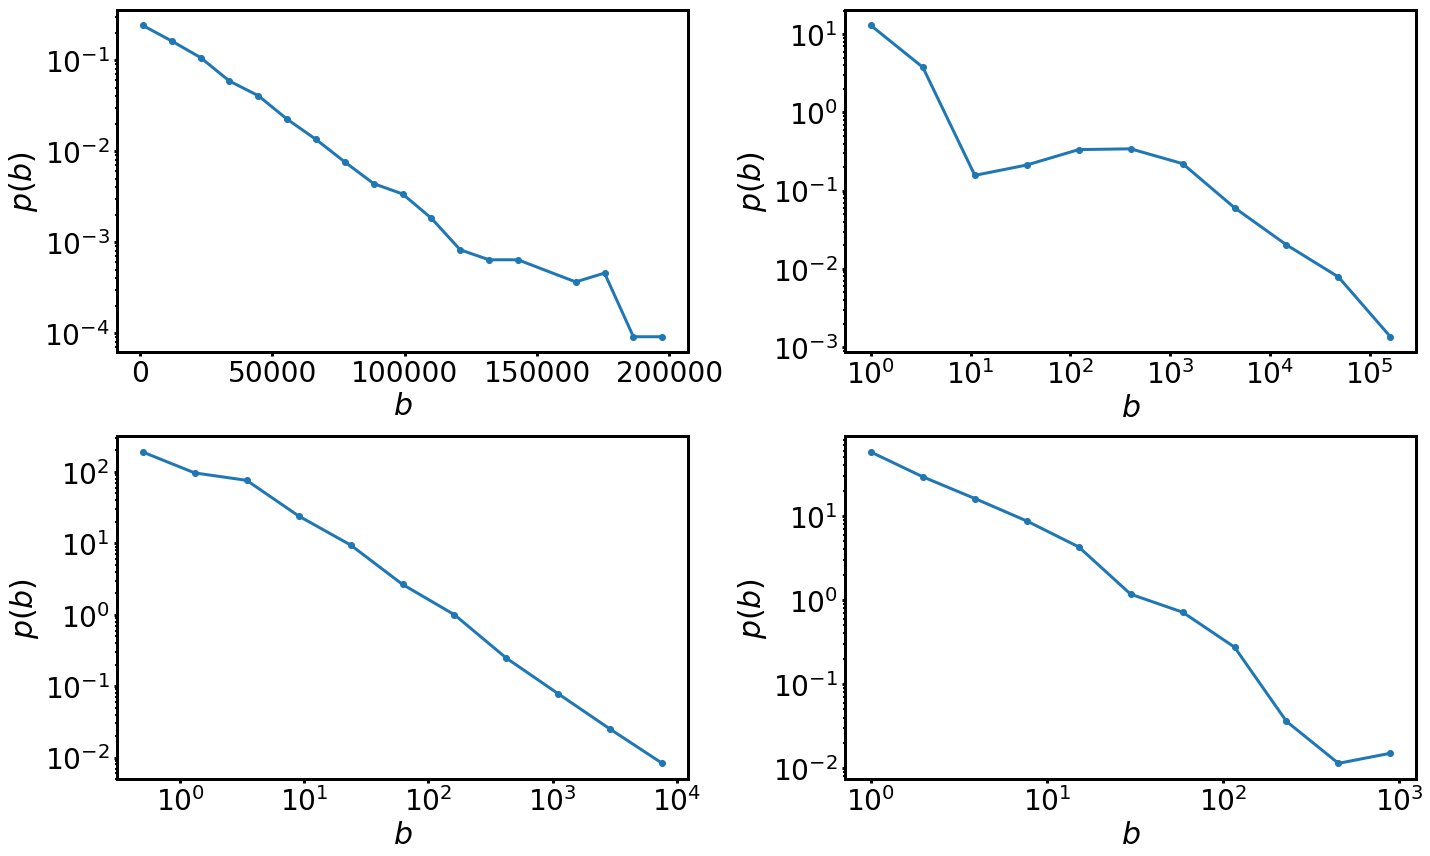

In [46]:
normalize = False

ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

btwSeqs =  [btw_values_dict['Ran'][0], btw_values_dict['BtwU'][0.22],
           btw_values_dict['DegU'][0.275], btw_values_dict['Ran'][0.75]]



for i, btwSeq in enumerate(btwSeqs):

    mask = btwSeq > 0
    btwSeq = btwSeq[mask]
    if normalize:
        btwSeq = btwSeq / ((N-1) * (N-2) / 2)
        lower_cote = 1 / ((N-1) * (N-2) / 2)
        upper_cote = 1
    else:
        btwSeq.astype('int')
        lower_cote = 1 
        upper_cote = (N-1) * (N-2) / 2

    minb = min(btwSeq)
    maxb = max(btwSeq)

    if i == 0:
        bins = np.linspace(minb, maxb, 20)
    else:
        bins = np.logspace(np.log10(minb), np.log10(maxb), 12)


    hist = np.histogram(btwSeq, bins=bins, density=False)
    widths = (bins[1:] - bins[:-1])
    hist_norm = hist[0]/widths
    hist_norm[hist_norm==0] = np.NaN

    ax = axes[i//2][i%2]
    mask = ~np.isnan(hist_norm)
    X = bins[:-1]
    X = X[mask]
    Y = hist_norm[mask]
    ax.plot(X, Y, 'o-')
    #ax.plot(*Counter(btwSeq))
    ax.set_yscale('log')
    if i != 0:
        ax.set_xscale('log')
    ax.set_xlabel('$b$')
    ax.set_ylabel('$p(b)$')

plt.tight_layout()
#plt.savefig(figs_dir + '/pdf/btwSeq_' + network + '.pdf')
#plt.savefig(figs_dir + '/png/btwSeq_' + network + '.png')   
plt.show()

In [62]:
net_dir_name = '../networks/ER'

N_values = [125, 250, 500, 1000, 2000, 4000, 8000]
p_values = [0.032, 0.016, 0.008, 0.004, 0.002, 0.001, 0.0005]
seeds_by_N = [range(100), range(100), range(100), range(20), range(20), range(10), range(2)]

attacks = ['BtwU', 'DegU', 'Ran']


mean_deg_values = {}
mean_mean_deg_values = {}
std_mean_deg_values = {}
    
for N, p, seeds in zip(N_values, p_values, seeds_by_N):

    mean_deg_values[N] = {}    
    mean_mean_deg_values[N] = {}
    std_mean_deg_values[N] = {}
    
    for attack in attacks:
        
        mean_deg_values[N][attack] = []
        
        for seed in seeds:
                       
            network = 'ER_N{}_p{}_{:05d}'.format(N, p, seed)
            network_file = network + '.txt'
            full_network_path = os.path.join(net_dir_name, network, network_file)
            
            attack_dir_name = os.path.join(net_dir_name, network, attack)
            
            full_q_values_file_name  = os.path.join(attack_dir_name, 'deg_values.txt')
            data = np.loadtxt(full_q_values_file_name)
            
            _mean_deg_values = data[:,0]
            #_mean_deg_values[_mean_deg_values==1.0] = np.NaN
            
            mean_deg_values[N][attack].append(_mean_deg_values)

        mean_mean_deg_values[N][attack] = np.mean(mean_deg_values[N][attack], axis=0)
        std_mean_deg_values[N][attack] = np.std(mean_deg_values[N][attack], axis=0)

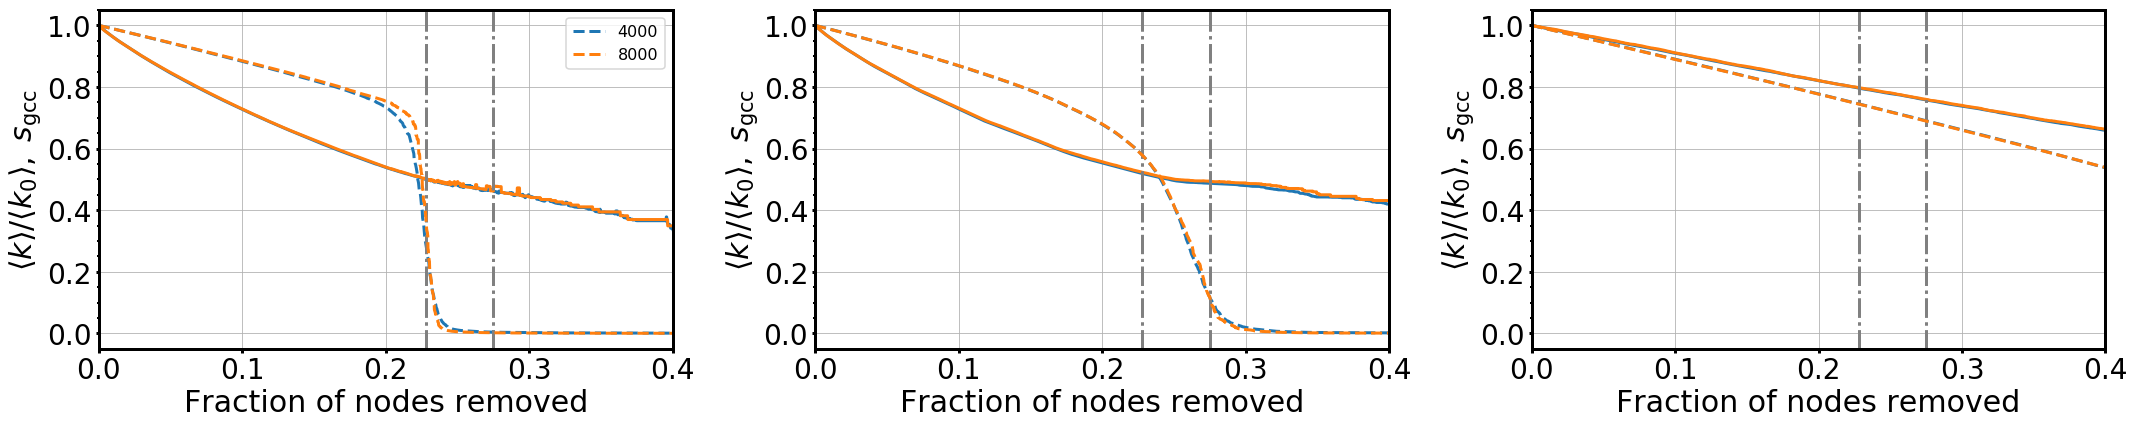

In [72]:
vlines = [0.228, 0.275, 0.745]

ncols = 3
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, attack in enumerate(attacks):
    ax = axes[i]
    for j, N in enumerate(N_values[5:]):
        
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_mean_deg_values[N][attack][:Ngcc0] / mean_mean_deg_values[N][attack][:Ngcc0][0]
        Y_err = std_mean_deg_values[N][attack][:Ngcc0]
        ax.plot(X, Y, color=colors[j])
        #ax.fill_between(X, Y-Y_err, Y+Y_err, alpha=0.3)
        #ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.axvline(vlines[0], linestyle='-.', color='grey')
        ax.axvline(vlines[1], linestyle='-.', color='grey')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0
        if i == 0:
            ax.plot(X, Y, linestyle='--', color=colors[j], label=N)
            ax.legend(loc='best', fontsize=16)
        else:
            ax.plot(X, Y, linestyle='--', color=colors[j])
        ax.set_xlim(0., 0.4)
        #ax.set_ylim(1.8, 2.5)
        ax.grid(True)
        ax.set_ylabel(r'$\langle k \rangle / \langle k_0 \rangle,\; s_{\mathrm{gcc}}$')
        ax.set_xlabel('Fraction of nodes removed')
        
        
plt.tight_layout()
fig_base_name = 'ER_degEvolution'
#plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
#plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

### FSSA

In [568]:
import fssa
from scipy.interpolate import interp1d

In [734]:
f = {}
f3 = {}

attack = 'Ran'
for N in N_values[:-2]:
    Ngcc0 = int(mean_Ngcc_values[N][attack][0])
    X = np.arange(Ngcc0) / Ngcc0
    Y = mean_Nsec_values[N][attack][:Ngcc0] / Ngcc0
    Y = mean_finiteSizeMeassures['meanS'][N][attack][:Ngcc0]
    Y = np.nan_to_num(Y)
    Y[Y==0] = 1
    f[N] = interp1d(X, Y)
    f3[N] = interp1d(X, Y, kind='cubic')

In [735]:
arr = []
X = np.linspace(0.2, 0.25, 1000)
for N in N_values[:-2]:
    arr.append(f3[N](X))
    
arr = np.array(arr)
darr = 0.1*arr

In [736]:
ret = fssa.autoscale(np.array(N_values[:-2]), X, arr, darr, 0.75, -1, 3)
#ret = fssa.autoscale(np.array(N_values[:-2]), X, arr, darr, 0.225, 1.5, 1.8)

In [737]:
ret

           dnu: nan
          drho: nan
         dzeta: nan
        errors: array([nan, nan, nan])
 final_simplex: (array([[ 0.75, -1.  ,  3.  ],
       [ 0.75, -1.  ,  3.  ],
       [ 0.75, -1.  ,  3.  ],
       [ 0.75, -1.  ,  3.  ]]), array([nan, nan, nan, nan]))
           fun: nan
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 604
           nit: 121
            nu: -1.0
           rho: 0.75
        status: 1
       success: False
         varco: array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])
             x: array([ 0.75, -1.  ,  3.  ])
          zeta: 3.0

In [738]:
print(r'f_c = ' + '{:.4f} +- {:.4f}'.format(ret.rho, ret.drho))
print(r'beta = ' + '{:.4f} +- {:.4f}'.format(ret.zeta, ret.dzeta))
print(r"nu' = " + '{:.4f} +- {:.4f}'.format(ret.nu, ret.dnu))

f_c = 0.7500 +- nan
beta = 3.0000 +- nan
nu' = -1.0000 +- nan


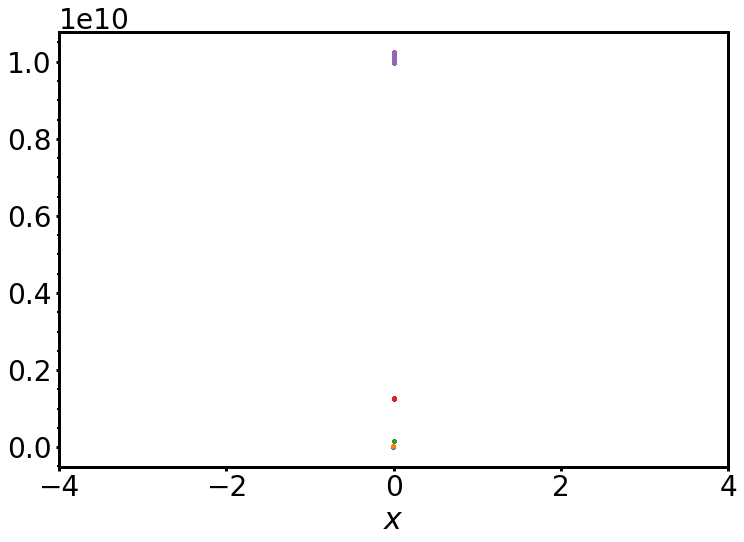

In [739]:
auto_scaled_data = fssa.scaledata(N_values[:-2], X, arr, darr, ret.rho, ret.nu, ret.zeta)

fig, ax = plt.subplots(figsize=(12, 8))
#ax.set_prop_cycle(cycler('color', palette))
ax.plot(
    auto_scaled_data.x.T, auto_scaled_data.y.T,
    '.',
)
ax.set_xbound(-4, 4)
ax.set_xlabel(r'$x$')
plt.show()

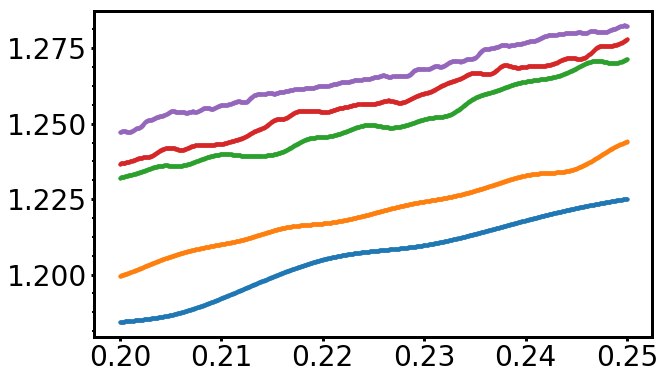

In [740]:
ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes
for i, N in enumerate(N_values[:-2]):
    ax.plot(X, arr[i], '.')
#ax.set_xlim(0.5, 0.7)
#ax.set_ylim(2.8, 5.2)
plt.show()

In [ ]:
fig, axes = plt.subplots(figsize=(24, 18), ncols=3, nrows=3)

x_lims = [(0, 0.4), (0, 0.4), (0, 1)]

for i, attack in enumerate(attacks):
        
    for N in N_values:
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        ax = axes[0][i]
        ax.set_ylabel(r'$s_{\mathrm{gcc}}$')
        #ax.set_xlabel('Fraction of removed nodes')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0
        ax.set_xlim(x_lims[i])
        if i == 0:
            ax.plot(X, Y, label=r'$N = $' + '{}'.format(N))
            ax.legend(loc='best', fontsize=16)
        else:
            ax.plot(X, Y)
        line_x = np.arange(0, 1.01, 0.01)
        line_y = 1 - line_x
        ax.plot(line_x, line_y, '--', color='k')
        
        ax.text(0.3, 0.85, attack, transform=ax.transAxes, fontsize=26)
        #ax.set_xlim(0.20, 0.25)

        ax = axes[1][i]

        ax.set_xlabel('')
        
        ax.set_xlim(x_lims[i])
        X2 = np.arange(len(mean_delta2_btw_sum[N][attack])) / Ngcc0
        scaled = False
        if scaled:
            if attack == 'BtwU':
                Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2*N**(1.666))
                ax.set_ylabel(r'$\Delta/N^{5/3}$')
            elif attack == 'DegU':
                Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2*N**(1.333))
                ax.set_ylabel(r'$\Delta/N^{4/3}$')
            elif attack == 'Ran':
                Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2*N**(0.5))
                ax.set_ylabel(r'$\Delta/N^{0.5}$')
        else:
            Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2)
            ax.set_ylabel(r'$\Delta$')
        #Y2 = mean_delta2_btw_sum[N][attack] / (mean_Ngcc_values[N][attack]**2)

        ax.plot(X2, Y2)
        
        ax = axes[2][i]
        ax.set_xlabel('Fraction of removed nodes')
        
        ax.set_xlim(x_lims[i])
        X2 = np.arange(len(mean_delta2_btw_sum[N][attack])) / Ngcc0
        if scaled:
            if attack == 'BtwU':
                Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2*N**(1.666))
                ax.set_ylabel(r'$\Delta/N^{5/3}$')
            elif attack == 'DegU':
                Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2*N**(1.333))
                ax.set_ylabel(r'$\Delta/N^{4/3}$')
            elif attack == 'Ran':
                Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2*N**(0.5))
                ax.set_ylabel(r'$\Delta/N^{0.5}$')
        else:
            Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2)
            ax.set_ylabel(r'$\Delta$')
        #Y2 = mean_delta2_btw_sum[N][attack] / ((Ngcc0**2)*N**(0))
        #Y2 = mean_delta2_btw_sum[N][attack] / (mean_Ngcc_values[N][attack]**2)
        
        ax.set_yscale('log')
        Y2[Y2==0] = np.NaN
        ax.plot(X2, Y2)
        #ax2.set_ylim(10E-8, 1)

plt.tight_layout()
if scaled:
    fig_base_name = 'Btw_change_ER_scaled'
else:
    fig_base_name = 'Btw_change_ER'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

## Figures for talk

KeyError: 0.15

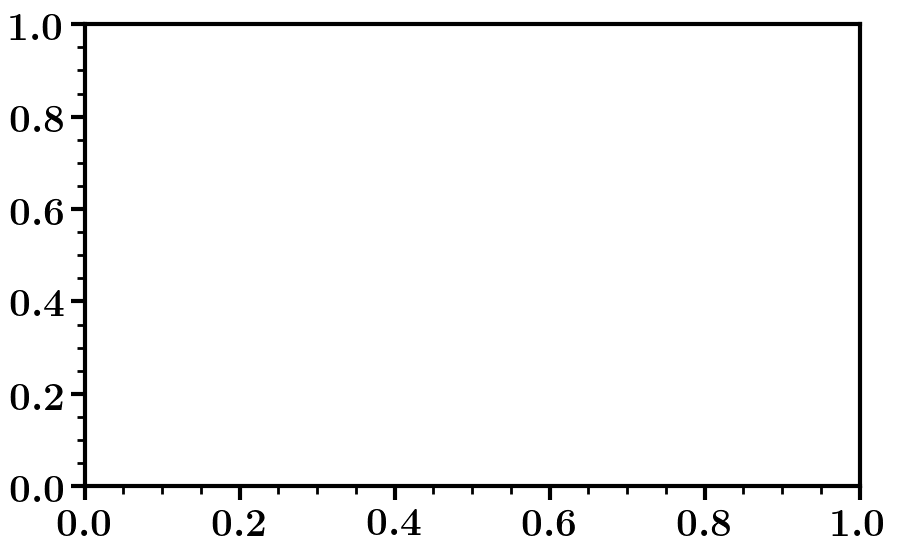

In [364]:
# log-scaled bins
bins = np.logspace(0, np.log10(N), 20)
widths = (bins[1:] - bins[:-1])

labels = ['', r'$f < f_c$', r'$f = f_c$', r'$f > f_c$', '']
linestyles = ['-.', '-.', '-', '--', '--']
ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

attack = 'BtwU'

_colors = ['#ca3542', '#ca3542', '#57575f', '#27647b', '#27647b']
_markers = ['s', 's', 'o', '^', '^']
_alphas = [0.6, 0.8, 1, 0.8, 0.6]
_linewidths = [2, 2, 3, 2, 2]
ax0 = axes
for i, f_value in enumerate([0.15, 0.20, 0.228, 0.25, 0.3]):
    Y = all_comp_sizes_dict[attack][f_value]
    hist = np.histogram(Y, bins=bins)
    hist_norm = hist[0]/widths
    hist_norm[hist_norm==0] = np.NaN
    ax0.plot(bins[:-1], hist_norm, label=labels[i], linestyle=linestyles[i], marker=_markers[i], 
             color=_colors[i], alpha=_alphas[i], linewidth=_linewidths[i])

ax0.set_xlabel(r'$s$')
ax0.set_ylabel(r'$p(s)$')
ax0.legend(loc='best', fontsize=20)
ax0.set_xscale('log')
ax0.set_yscale('log')

plt.tight_layout()
plt.show()

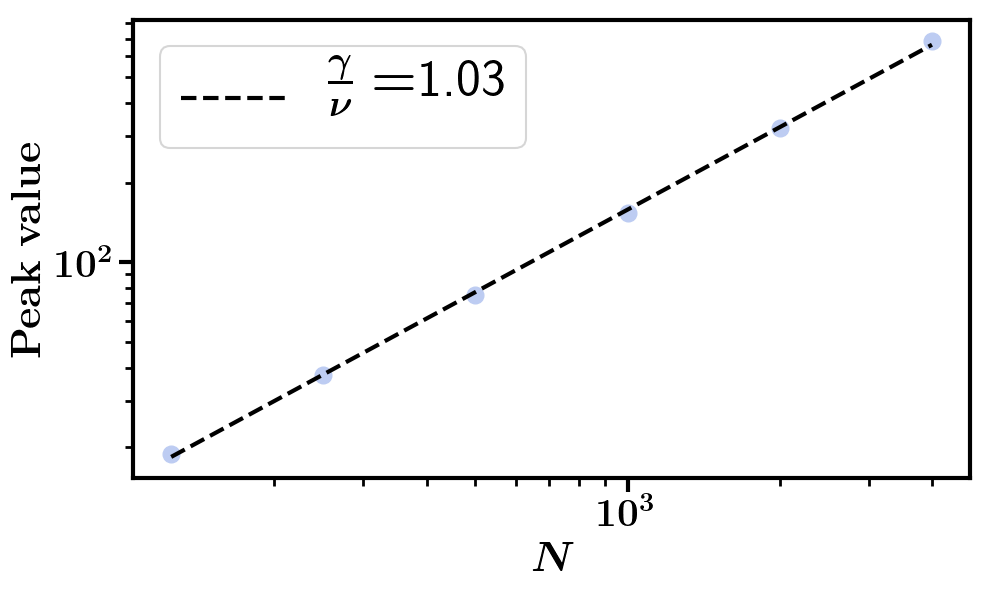

In [363]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class

from scipy.optimize import curve_fit

def fc_by_N(N, pc, b, nu):
    return pc - b*N**(-1/nu)

_N_values = N_values[:-1]

attack = 'BtwU'
max_stdNgcc = []
for N in _N_values:

    idx = np.argmax(var_Ngcc_values[N][attack])
    Y = np.sqrt(var_Ngcc_values[N][attack][idx])
    max_stdNgcc.append(Y)       

max_stdNgcc = np.array(max_stdNgcc)

ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes
ax.grid(False)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$\mathrm{Peak\; value}$")
ax.set_xlabel(r"$N$")

#locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

ax.plot(_N_values, max_stdNgcc, 'o', markersize=12)

X = np.log(_N_values).reshape(-1, 1)
Y = np.log(max_stdNgcc).reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
slope = linear_regressor.coef_[0][0]
ax.plot(_N_values, np.exp(Y_pred), '--', color='k', linewidth=3, label=r"$\frac{\gamma}{\nu} = $" + '{:.2f}'.format(slope))
ax.legend(loc='best', fontsize=38)    

plt.tight_layout()

fig_base_name = 'Peaks_scaling_talk'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
#plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

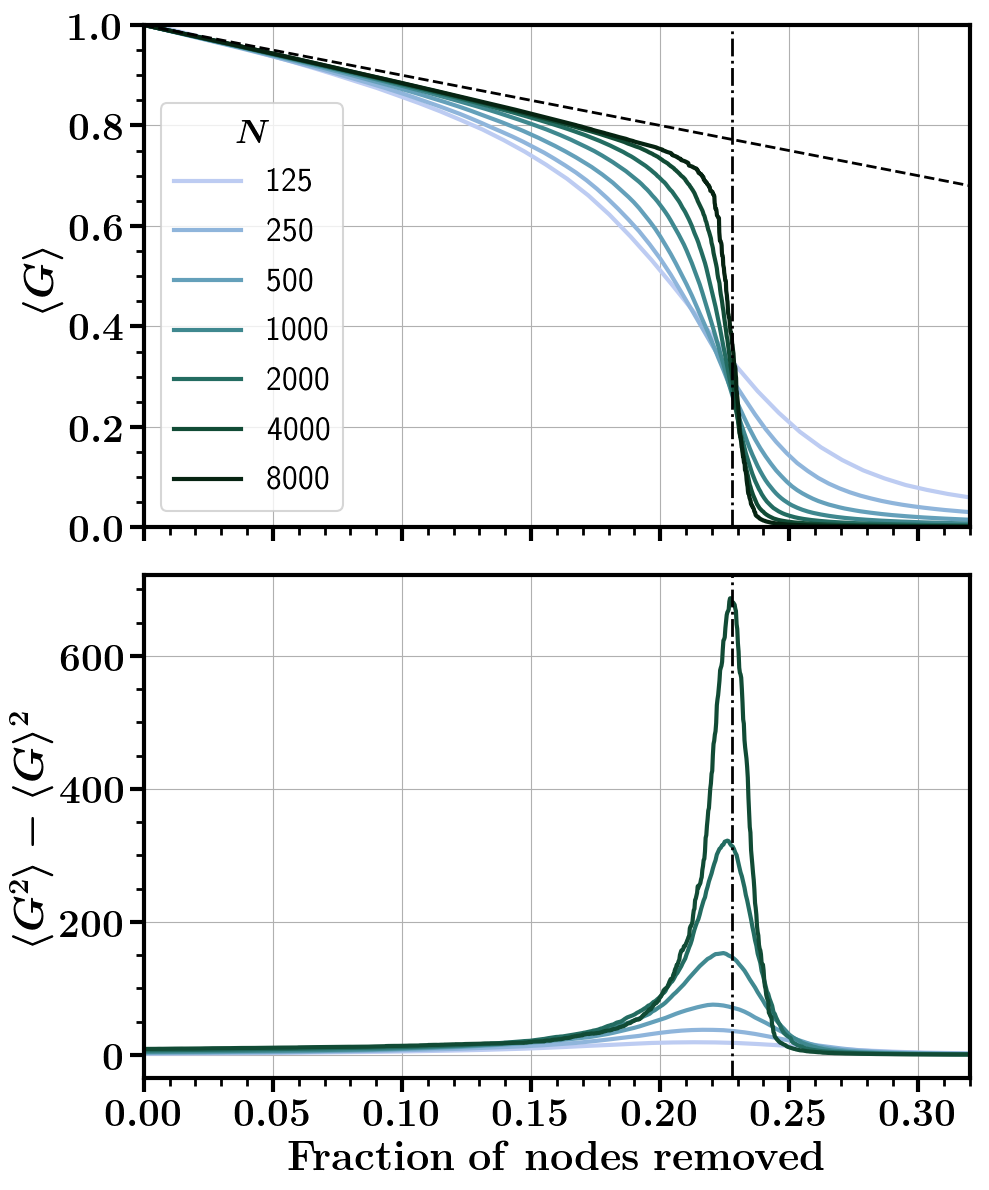

In [361]:
palette = sns.cubehelix_palette(
    n_colors=len(N_values), start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.8, dark=0.1,
)
plt.rc('axes', prop_cycle=cycler('color', palette))

attack = 'BtwU'

ncols = 1
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes[0]
ax.grid(True)
#ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\langle G\rangle $')
ax.set_xlim(0, 0.32)
ax.set_ylim(0, 1)
#ax.set_xticks([])
plt.setp(ax.get_xticklabels(), visible=False)
for j, N in enumerate(N_values):
    Ngcc0 = int(mean_Ngcc_values[N][attack][0])
    X = np.arange(Ngcc0) / Ngcc0
    Y = mean_Ngcc_values[N]['BtwU'][:Ngcc0] / Ngcc0
    ax.plot(X, Y, label='{}'.format(N))
line_y = 1 - line_x
ax.plot(line_x, line_y, '--', linewidth=2, color='k')
ax.axvline(0.228, linestyle='-.', color='k', linewidth=2)#, label=r'$t_c$')
ax.legend(loc=3, title=r'$N$', title_fontsize=24, fontsize=24)


ax = axes[1]
ax.grid(True)
#ax.set_xlabel(r'$t$')
ax.set_xlabel(r'$\mathrm{Fraction\; of\; nodes\; removed}$')
ax.set_ylabel(r'$\langle G^2\rangle - \langle G\rangle^2 $')
ax.set_xlim(0, 0.32)
#ax.set_ylim(0, 1)
for j, N in enumerate(N_values[:-1]):
    Ngcc0 = int(mean_Ngcc_values[N][attack][0])
    X = np.arange(Ngcc0) / Ngcc0
    Y = np.sqrt(var_Ngcc_values[N]['BtwU'][:Ngcc0])
    ax.plot(X, Y, label='{}'.format(N))
ax.axvline(0.228, linestyle='-.', color='k', linewidth=2)#, label=r'$t_c$')
ax.set_xticks([0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.30])

plt.tight_layout()

fig_base_name = 'order_par_talk'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png', transparent=False)
plt.show()

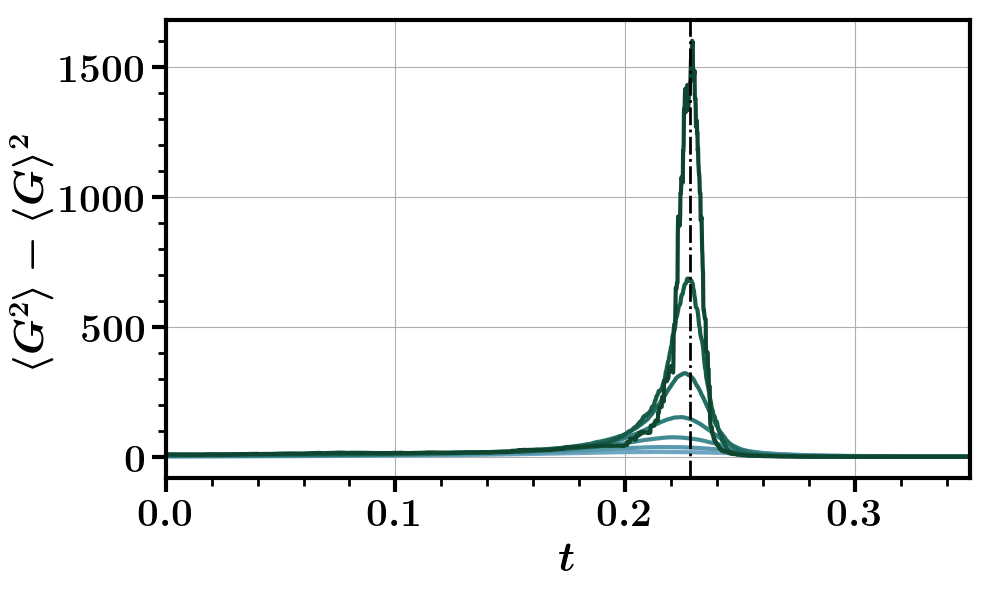

In [315]:
palette = sns.cubehelix_palette(
    n_colors=len(N_values), start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
)
plt.rc('axes', prop_cycle=cycler('color', palette))

attack = 'BtwU'

ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes
ax.grid(True)
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\langle G^2\rangle - \langle G\rangle^2 $')
ax.set_xlim(0, 0.35)
#ax.set_ylim(0, 1)

for j, N in enumerate(N_values):
    Ngcc0 = int(mean_Ngcc_values[N][attack][0])
    X = np.arange(Ngcc0) / Ngcc0
    Y = np.sqrt(var_Ngcc_values[N]['BtwU'][:Ngcc0])
    ax.plot(X, Y, label='{}'.format(N))
    
ax.axvline(0.228, linestyle='-.', color='k', linewidth=2)#, label=r'$t_c$')


#ax.legend(loc='best', title=r'$N$', title_fontsize=24, fontsize=24)
plt.tight_layout()

fig_base_name = 'suscept_talk'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.show()

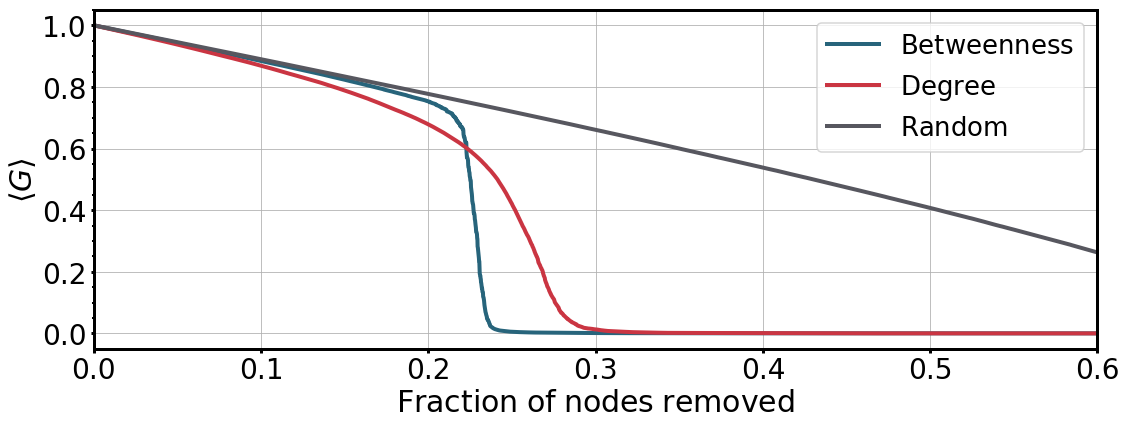

In [18]:
ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(16*ncols, 6*nrows), ncols=ncols, nrows=nrows)

N = 8000
Ngcc0 = int(mean_Ngcc_values[N][attack][0])

ax = axes
ax.grid(True)
ax.set_ylabel(r'$\langle G \rangle$')
ax.set_xlabel(r'$\mathrm{Fraction\; of\; nodes\; removed}$')
X = np.arange(Ngcc0) / Ngcc0
Y1 = mean_Ngcc_values[N]['BtwU'][:Ngcc0] / Ngcc0
Y2 = mean_Ngcc_values[N]['DegU'][:Ngcc0] / Ngcc0
Y3 = mean_Ngcc_values[N]['Ran'][:Ngcc0] / Ngcc0
ax.set_xlim(0, 0.6)

ax.plot(X, Y1, label=r'$\mathrm{Betweenness}$', color='#27647b', linewidth=4)
ax.plot(X, Y2, label=r'$\mathrm{Degree}$', color='#ca3542', linewidth=4)
ax.plot(X, Y3, label=r'$\mathrm{Random}$', color='#57575f', linewidth=4)
#ax.axvline(0.22, linestyle='-', color='grey')
ax.legend(loc='best')

plt.tight_layout()

fig_base_name = 'Percolation2_ER_talk'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png', transparent=False)
plt.show()

In [ ]:
N = 2000
p = 0.002

_f_val = 0.228

f_values_by_attack = {'BtwU': [_f_val],
                      'DegU': [_f_val],
                      'Ran':  [_f_val]}

btw_values_dict = {}
for attack in attacks: 
    print(attack)

    btw_values_dict[attack] = {}
    for f_value in f_values_by_attack[attack]:
        print(f_value)
        btw_values_dict[attack][f_value] = []
        for seed in range(1000): 
            print(seed)
            network = 'ER_N{}_p{}_{:05d}'.format(N, p, seed)

            network_file = network + '.txt'
            full_network_path = os.path.join(net_dir_name, network, network_file)

            attack_dir_name = os.path.join(net_dir_name, network, attack)               
            btw_matrix_file = os.path.join(attack_dir_name, 'btwMatrix.pickle.bz2')
            with bz2.BZ2File(btw_matrix_file, 'r') as f:
                btw_matrix = pickle.load(f)
            btw_values = btw_matrix[int(N*f_value)]  
            btw_values_dict[attack][f_value] = np.concatenate((btw_values_dict[attack][f_value], btw_values))

In [324]:
with open('btw_values_dict.pickle', 'wb') as f:
    pickle.dump(btw_values_dict, f)

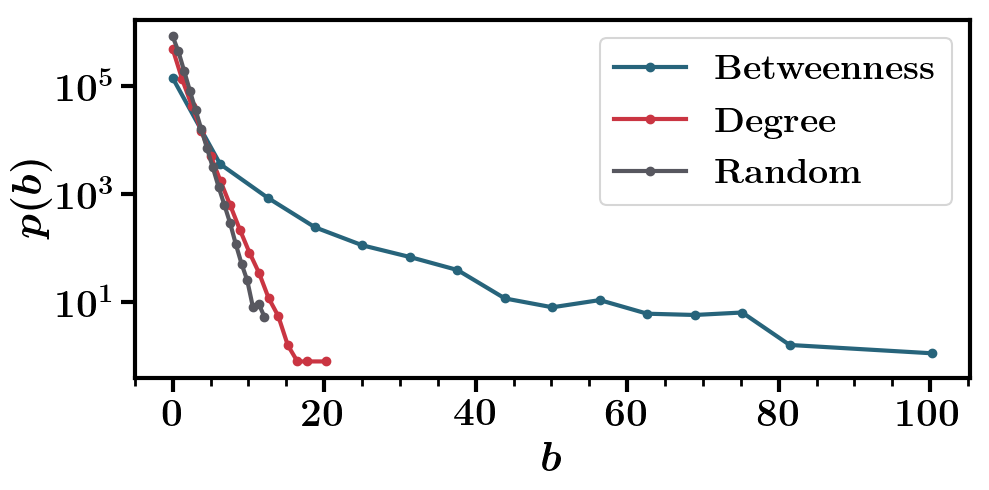

In [334]:
f_value = _f_val
normalize = False

_colors = ['#27647b', '#ca3542', '#57575f']
_labels = [r'$\mathrm{Betweenness}$', r'$\mathrm{Degree}$', r'$\mathrm{Random}$']
ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 5*nrows), ncols=ncols, nrows=nrows)
for j, attack in enumerate(attacks):

    btwSeq = btw_values_dict[attack][f_value]
    mask = btwSeq > 0
    btwSeq = btwSeq[mask]
    if normalize:
        btwSeq = btwSeq / ((N-1) * (N-2) / 2)
        lower_cote = 1 / ((N-1) * (N-2) / 2)
        upper_cote = 1
    else:
        btwSeq.astype('int')
        lower_cote = 1 
        upper_cote = (N-1) * (N-2) / 2
        
    btwSeq = btwSeq/np.mean(btwSeq)

    minb = min(btwSeq)
    maxb = max(btwSeq)

    for i in range(1):

        if i == 0:
            bins = np.linspace(minb, maxb, 18)
        else:
            bins = np.logspace(np.log10(minb), np.log10(maxb), 10)
            #bins = np.exp2(np.arange(np.log2(minb), np.log2(maxb)))

        hist = np.histogram(btwSeq, bins=bins, density=False)
        widths = (bins[1:] - bins[:-1])
        hist_norm = hist[0]/widths
        hist_norm[hist_norm==0] = np.NaN

        ax = axes
        mask = ~np.isnan(hist_norm)
        X = bins[:-1]
        X = X[mask]
        Y = hist_norm[mask]
        ax.plot(X, Y, 'o-', color=_colors[j], label=_labels[j])
        #ax.plot(*Counter(btwSeq))
        ax.set_yscale('log')
        if i == 1:
            ax.set_xscale('log')
        ax.set_xlabel('$b$')
        ax.set_ylabel('$p(b)$')
        ax.legend(loc='best')
plt.tight_layout()
#plt.savefig(fig_dir + '/pdf/btwSeq_' + network + '.pdf')
plt.savefig(fig_dir + '/png/btwSeq_' + network + '.png')   
plt.show()

In [ ]:
N = 2000
p = 0.002

f_value = 0.0
attack = 'BtwU'
btw_values_dict = {}
btw_values_dict[attack] = {}


btw_values_dict[attack][f_value] = []
for seed in range(1000): 
    print(seed)
    network = 'ER_N{}_p{}_{:05d}'.format(N, p, seed)

    network_file = network + '.txt'
    full_network_path = os.path.join(net_dir_name, network, network_file)

    attack_dir_name = os.path.join(net_dir_name, network, attack)               
    btw_matrix_file = os.path.join(attack_dir_name, 'btwMatrix.pickle.bz2')
    with bz2.BZ2File(btw_matrix_file, 'r') as f:
        btw_matrix = pickle.load(f)
    btw_values = btw_matrix[int(N*f_value)]  
    btw_values_dict[attack][f_value] = np.concatenate((btw_values_dict[attack][f_value], btw_values))

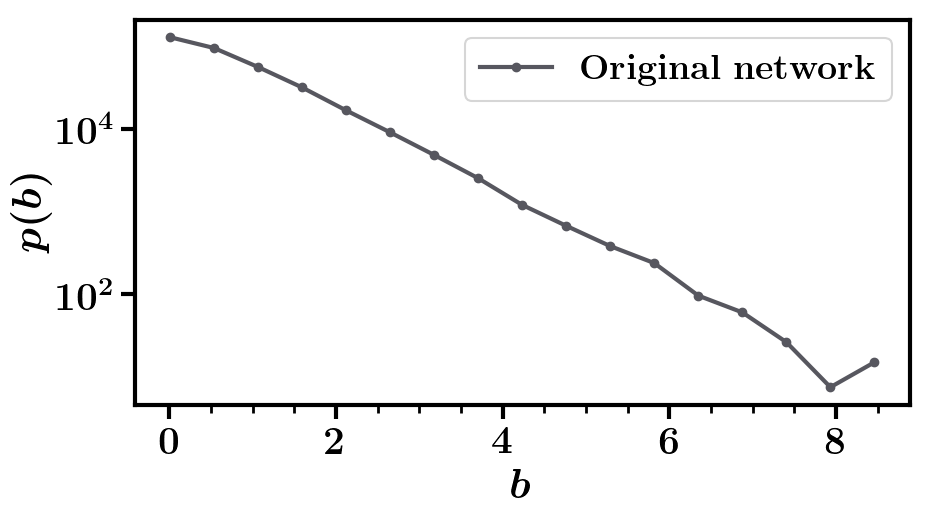

In [351]:
attack = 'BtwU'
_colors = ['#27647b', '#ca3542', '#57575f']


btwSeq = btw_values_dict[attack][f_value]
mask = btwSeq > 0
btwSeq = btwSeq[mask]       
btwSeq = btwSeq/np.mean(btwSeq)

minb = min(btwSeq)
maxb = max(btwSeq)

bins = np.linspace(minb, maxb, 18)

hist = np.histogram(btwSeq, bins=bins, density=False)
widths = (bins[1:] - bins[:-1])
hist_norm = hist[0]/widths
hist_norm[hist_norm==0] = np.NaN

ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 5*nrows), ncols=ncols, nrows=nrows)
ax = axes
mask = ~np.isnan(hist_norm)
X = bins[:-1]
X = X[mask]
Y = hist_norm[mask]
ax.plot(X, Y, 'o-', color=_colors[j], label=r'$\mathrm{Original\;network}$')
ax.set_yscale('log')
ax.set_xlabel('$b$')
ax.set_ylabel('$p(b)$')
ax.legend(loc='best')
plt.savefig(fig_dir + '/png/original_btwSeq_' + network + '.png')   
plt.show()

In [232]:
import os
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'k', 'y',
          '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'k', 'y']
markers = ['s', 'o', 'v', '^', '*', '<', '>', '8', '.', '',
           's', 'o', 'v', '^', '*', '<', '>', '8', '.', '']

rc_font_size = 30
rc_label_size = 28
rc_legend_size = 26

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\boldmath']
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['legend.fontsize'] = rc_legend_size
mpl.rcParams['savefig.transparent'] = True
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['axes.labelsize'] = rc_font_size
mpl.rcParams['xtick.labelsize'] = rc_label_size
mpl.rcParams['ytick.labelsize'] = rc_label_size
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['xtick.minor.size'] = 6
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['ytick.minor.size'] = 6
mpl.rcParams['patch.linewidth'] = 1.5